## Особенности обучения
1. Запускаем FD на первые несколько шагов
2. Считаем boundary loss
3. Считаем physics loss, используя значения из всего диапазона времени и прстранства
4. После обучения используем последующие шаги FD для проверки генерализации
5. Затем обучаем из разных источников

# Preprocessing

In [1]:
import os
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import h5py

In [2]:
with h5py.File('data.hdf5', 'r') as f:
    print(f.keys())
    print(len(f.keys()))

<KeysViewHDF5 []>
0


In [9]:
columns = ['x', 'z', 'dd', 'dt', 'nabs', 'a', 'FreeSurf']
df = pd.DataFrame(columns=columns)

with h5py.File('data.hdf5', 'r') as f:  # чтение из файла
    SIZE = len(f.keys())
    vp = f['vp'][:]
    wav = f['wav'][:]
    for i in range(20):
        name = f'{i}_sim'
        srcx, srcz = f[name + '_source'][:]
        dd, dt, _, __ = f['params'][:]
        nabs, a, FreeSurf = f['params_2'][:]   
        df.loc[i] = [srcx, srcz, dd, dt, nabs, a, FreeSurf]
       # simulation =  f[name][:]


KeyError: "Unable to open object (object 'vp' doesn't exist)"

In [10]:
ix = np.random.choice(len(df), len(df), False)
tr, val = np.split(ix, [15])  # разбиваем датасет

X_train = df.loc[tr]
X_val = df.loc[val]

In [11]:
import torch
import albumentations
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from PIL import Image
from tqdm import tqdm
from torchvision import models as models
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import cv2
from skimage.transform import resize
from skimage import io
from os.path import join as J

device = ('cuda:0' if torch.cuda.is_available() else 'cpu')  # включаем поддержку GPU
device

'cuda:0'

In [12]:
class Simulations(Dataset):
    """
    Итерируемый класс датасета. С помощью него мы можем обращаться к данным как к итерируемому объекту. 
    """
    def __init__(self, df):
        """
        """
        self.X = df
       
    def __len__(self):
        return (len(self.X))
    
    def __getitem__(self, i):
        """
        """
        srcx, srcz, dd, dt, nabs, a, FreeSurf = self.X.iloc[i]
        with h5py.File('data.hdf5', 'r') as f:  # чтение из файла
            simulation =  f[name][:]
            wav = f['wav'][:]
            vp = f['vp'][:]
            sim = resize(simulation, (100, 100))
        return sim, wav, vp, srcx, srcz, dd, dt, nabs, a, FreeSurf

In [13]:
train_data = Simulations(X_train)
val_data = Simulations(X_val)


# dataloaders - с помощью нашего класса датасета сэмплируют данные в батчи
BATCH_SIZE = 1
trainloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)  
valloader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=False)

ValueError: num_samples should be a positive integer value, but got num_samples=0

In [14]:
sim = train_data[10][0]

IndexError: single positional indexer is out-of-bounds

In [18]:

with h5py.File('data.hdf5', 'r') as f:  # чтение из файла
    for i in tqdm(range(20)):
        name = f'{i}_sim'
        sim = f[name][:]
        sim = resize(sim, (100, 100))
        sim = sim.transpose(2, 1, 0)
        k = 0
        for ph in sim:
            io.imsave(f'ae data/{i}_{k}.jpg', ph)
            k +=1

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_0.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_1.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.531589773880965e-13, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_2.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.7171334615565399e-12, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_28.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.5502482473385617e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_29.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.077911408884065e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_30.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.658278189275905e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_31.jpg is a low contrast 

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_56.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.854487885845411e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_57.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.2897200791778735e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_58.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.7479328891289115e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_59.jpg is a low contrast

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_84.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.4769709741887372e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_85.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.545434903323905e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_86.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.6106369064929123e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_87.jpg is a low contrast

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_112.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.9853315412828635e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_113.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.9301527190067038e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_114.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.8743075461799827e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_115.jpg is a low con

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_139.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3032281110374214e-08, 4.541643207432692e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_140.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3051758669566248e-08, 4.717921282525306e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_141.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3035234169044264e-08, 4.881488076999592e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_166.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.0739594847828387e-08, 4.169975759664155e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_167.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.0693137809904463e-08, 3.981521479722737e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_168.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.061418720451354e-08, 3.815671664781698e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_193.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.193369669855825e-09, 2.5504357505610893e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_194.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.084366620286312e-09, 2.5076805506569504e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_195.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.0010995979417784e-08, 2.459217736382432e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_220.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.490781273544309e-08, 2.019526891548822e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_221.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.4621851190782788e-08, 2.0259011291338388e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_222.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.432320925786712e-08, 2.0269848305473668e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_247.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.2434643232676475e-09, 1.779404542624926e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_248.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.289161259539318e-09, 1.7743609963414888e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_249.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.324661628952383e-09, 1.7648269104489362e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_274.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.847242377196255e-09, 1.592034074989109e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_275.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.8353623148801224e-09, 1.5863792296790216e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_276.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.813226103630142e-09, 1.5767202688648873e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

Lossy conversion from float64 to uint8. Range [-6.392623363790403e-09, 1.4561914600361628e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_301.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.344043482461939e-09, 1.4430541444539399e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_302.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.312343954003081e-09, 1.4384065210277622e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_303.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.29383993

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_327.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.948078126114365e-09, 1.3478297677474903e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_328.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.895952938923031e-09, 1.3401865771966608e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_329.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.885638280798264e-09, 1.345176518406987e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_354.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.679237470840132e-09, 1.2804786129013505e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_355.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.684804635372157e-09, 1.2792466352823224e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_356.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.674363694276804e-09, 1.2747622825078538e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

Lossy conversion from float64 to uint8. Range [-5.415700531675606e-09, 1.2138453720415023e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_381.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.402860360874737e-09, 1.208605284190232e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_382.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.37390691328723e-09, 1.2043758792011944e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_383.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.3285541843

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_407.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.138544421781229e-09, 1.1475943610595714e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_408.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.1185676732440446e-09, 1.1389286733346606e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_409.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.126551043398609e-09, 1.1372738133209657e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_434.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.964255344589968e-09, 1.1072482118039877e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_435.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.9574460862226295e-09, 1.1064299568714694e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_436.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.936058199222117e-09, 1.1031059362115294e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

Lossy conversion from float64 to uint8. Range [-4.767807315438519e-09, 1.0636771422979151e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_461.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.746991769646066e-09, 1.0600353171611182e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_462.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.711529563757811e-09, 1.0563554845992236e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_463.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.71067606

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_487.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.602735017814314e-09, 1.0211676354893247e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_488.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.5998787495320756e-09, 1.0206228201525565e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_489.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.585644763897907e-09, 1.0233467279253888e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_514.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.4282781566443764e-09, 9.91495357999947e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_515.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.432330812281601e-09, 9.876072745969934e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_516.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.42387470298484e-09, 9.873480116299123e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_541.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.30615935816242e-09, 9.533573676594679e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_542.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.303586099671757e-09, 9.573776568082429e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_543.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.288492001164829e-09, 9.591781963037117e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_568.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.14347869963803e-09, 9.316444417484959e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_569.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.15465307198531e-09, 9.308335958193472e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_570.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.155757317913006e-09, 9.276691259169554e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_595.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.058830297803148e-09, 9.067300023045656e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_596.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.046620981853551e-09, 9.068213582823268e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_597.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.0324602138825e-09, 9.056901156331017e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_622.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.9346425823613855e-09, 8.813644315786364e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_623.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.938668565946697e-09, 8.812005820559713e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_624.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.937669460995501e-09, 8.788031763134048e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_649.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.823613555571588e-09, 8.61458589527612e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_650.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.827353512040472e-09, 8.600395729449578e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_651.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.832221941818146e-09, 8.582110652094143e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_676.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.7425062527252985e-09, 8.404720191807828e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_677.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.729517809510213e-09, 8.407250569579938e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_678.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.737458375165557e-09, 8.395555689905619e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

Lossy conversion from float64 to uint8. Range [-3.653719536904319e-09, 8.211423429039786e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_703.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.6536836821345987e-09, 8.194512892667408e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_704.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.645714583352191e-09, 8.202756822650623e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_705.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.6447897511

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_729.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.5735636855256e-09, 8.047716327895823e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_730.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.5724523729667337e-09, 8.035955674694891e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_731.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.560995977915075e-09, 8.015728584719592e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_756.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.496599724498411e-09, 7.880661426522978e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_757.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.490351402853705e-09, 7.875116031657631e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_758.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4737134226043123e-09, 7.864903253822025e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_783.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4179327383961086e-09, 7.720967767895777e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_784.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4089866621553856e-09, 7.714996596243772e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_785.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4107167994590448e-09, 7.71285686264649e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

Lossy conversion from float64 to uint8. Range [-3.3456611922816515e-09, 7.571352269034497e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_810.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.3484285301443464e-09, 7.56527964424311e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_811.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.3431737479544242e-09, 7.565580799490078e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_812.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.343114923

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_836.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.2824748067473842e-09, 7.433793150633739e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_837.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.274637563329471e-09, 7.420071571642101e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_838.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.275684405623503e-09, 7.419245640600647e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_863.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.2115496017417893e-09, 7.296586778098312e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_864.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.211611604664514e-09, 7.271473358906456e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_865.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.215113191627257e-09, 7.283932181670049e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_890.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.1570989558356846e-09, 7.152693753852678e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_891.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.1463856534646603e-09, 7.164484037628834e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_892.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.1474222602835306e-09, 7.157838291840581e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_917.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.0912567395412873e-09, 7.048851395218111e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_918.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.0954870200268647e-09, 7.033750101787625e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_919.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.0946229949025974e-09, 7.028855753555008e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_944.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.0330629452349235e-09, 6.915948966806041e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_945.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.0307580104037738e-09, 6.925759220018197e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_946.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.029086038334255e-09, 6.917723948765084e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_971.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.988194705414061e-09, 6.8128569846154194e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_972.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.9817068055366406e-09, 6.808228410145748e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_973.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.9760055970815713e-09, 6.807028141032996e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_998.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.932318868012739e-09, 6.710262019913974e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/0_999.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.9354146368274748e-09, 6.70323042793804e-09]. Convert image to uint8 prior to saving to suppress this warning.
  5%|████▏                                                                              | 1/20 [00:14<04:42, 14.88s/it]C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_0.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_26.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.651489703792661e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_27.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.9508608119647837e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_28.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.280212889267636e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_29.jpg is a low contrast 

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_54.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.2472594259334713e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_55.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.480493160090737e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_56.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.724940581423835e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_57.jpg is a low contrast 

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_82.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.2106601186587676e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_83.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.2335012600700213e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_84.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.2536438116762393e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_85.jpg is a low contras

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_110.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.985700212579063e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_111.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.601986198652731e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_112.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.183037594923678e-09, 1.105312353669414e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_113.j

Lossy conversion from float64 to uint8. Range [-1.6825354242648013e-09, 2.833052507220841e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_137.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.6876333446644228e-09, 2.8785212416940114e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_138.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.6876555418154591e-09, 2.9145971723726056e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_139.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.682307

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_163.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.01074158798955e-09, 1.4732920143070368e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_164.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.860462246172225e-10, 1.412170811062508e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_165.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.570003611398795e-10, 1.3472458083926751e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_190.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3457534070099157e-08, 3.999868013641951e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_191.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3569508843357111e-08, 3.860431476355362e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_192.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3630444816711437e-08, 3.85738798611272e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_217.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.822664083859584e-09, 2.299936489038377e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_218.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.594283375082189e-09, 2.250543422650225e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_219.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.359951557903875e-09, 2.194312080423773e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launche

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_244.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.018680000271774e-09, 1.3430913598832575e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_245.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.9199734792645514e-09, 1.3639058695464564e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_246.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.8223773084235893e-09, 1.3805240211645882e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_271.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.0296743296581282e-09, 1.1908203624216326e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_272.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.0059620588639408e-09, 1.1775588677563598e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_273.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.803875858594492e-10, 1.1606136907551477e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_298.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.148746536855742e-10, 9.621586621813257e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_299.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.222010014939685e-10, 9.803420471433801e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_300.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.270520599375615e-10, 9.955526813090585e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launche

Lossy conversion from float64 to uint8. Range [-5.25726141856045e-10, 9.636480985412598e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_325.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.186837306378322e-10, 9.558978860570026e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_326.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.102875049654717e-10, 9.451051846777948e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_327.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.006542731784

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_351.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.4562769642742196e-10, 8.357011804413253e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_352.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.54667981726451e-10, 8.502755577454259e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_353.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.6173166731392474e-10, 8.622469008674253e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

Lossy conversion from float64 to uint8. Range [-4.485627170657953e-10, 8.35921190294771e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_378.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.434541338120305e-10, 8.267246758107961e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_379.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.3712268928805575e-10, 8.169516206498501e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_380.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.29665641479

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_404.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.1087051604351385e-10, 7.712995270943091e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_405.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.175393437682717e-10, 7.797336040821388e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_406.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.2245804809737706e-10, 7.85713252595293e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_431.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.970169396951345e-10, 7.314235717013384e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_432.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.9141161474917273e-10, 7.276249223020661e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_433.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.8602822200534884e-10, 7.221495649526487e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_458.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.9201350932686507e-10, 7.23726241021514e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_459.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.9306073611379916e-10, 7.211901760264554e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_460.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.926787704075729e-10, 7.16812196428994e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launche

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_485.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.54021936522118e-10, 6.674372672812825e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_486.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4855248322416814e-10, 6.749795129280197e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_487.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.532633794368402e-10, 6.818834880617982e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launche

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_512.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.600624989891435e-10, 6.61685521760959e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_513.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.573636566780347e-10, 6.612746374416043e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_514.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.5354115985109973e-10, 6.598622609895102e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launche

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_539.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4637281565967193e-10, 6.486824558647078e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_540.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.48203004772748e-10, 6.473883246711068e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_541.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.48687575459157e-10, 6.47890324185619e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_566.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.363689411055608e-10, 6.238923671515885e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_567.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.388647408627195e-10, 6.271107532653364e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_568.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4014590503300085e-10, 6.286496710337056e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_593.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.419087484479836e-10, 6.172163831781614e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_594.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.398604959155612e-10, 6.122934141546033e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_595.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.3837764415397195e-10, 6.053815372876428e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_620.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.52186785003669e-10, 6.093439017723686e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_621.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.5023983163507374e-10, 6.081318840709577e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_622.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.488939861861855e-10, 6.052144532797864e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launche

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_647.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.640635320937937e-10, 6.034271662226546e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_648.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.619656316296157e-10, 6.015079050287251e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_649.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.5880173769041137e-10, 5.976530864158971e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

Lossy conversion from float64 to uint8. Range [-3.70344992445129e-10, 5.924115645245635e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_674.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.7109089389754703e-10, 5.926659706682894e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_675.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.7059844941524655e-10, 5.932192817035258e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_676.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.6892425042

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_700.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.729916801546261e-10, 5.819788620627297e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_701.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.7501150428231413e-10, 5.83472624862699e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_702.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.757176158863309e-10, 5.831235954100175e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launche

Lossy conversion from float64 to uint8. Range [-3.7581693332813227e-10, 5.678708917160493e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_727.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.779343871163395e-10, 5.720215501579109e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_728.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.787536139959329e-10, 5.74392152308828e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_729.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.78665207133

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_753.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.797448623466103e-10, 5.597693845762555e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_754.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.823536200452387e-10, 5.635724625061957e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_755.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.836204733577944e-10, 5.659250024734096e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launche

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_780.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.838249002552482e-10, 5.539672201537668e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_781.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.862771822641997e-10, 5.56378346570374e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_782.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.87367842091119e-10, 5.578744655826029e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_807.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.877238090344341e-10, 5.489746795881164e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_808.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.893742546776569e-10, 5.498247258821539e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_809.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.896669240115316e-10, 5.489327039930886e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launche

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_834.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.903199546263667e-10, 5.426870919516435e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_835.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.905619707086015e-10, 5.413479407398363e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_836.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.894765482183482e-10, 5.382510234333954e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launche

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_861.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.920391215957522e-10, 5.320976128457923e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_862.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.9025513282617467e-10, 5.278047373527606e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_863.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.872586599042708e-10, 5.217576009215826e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_888.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.89710956877052e-10, 5.142117066266911e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_889.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.8575283500319483e-10, 5.064998496499591e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_890.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.8066482334511387e-10, 4.971067729398705e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_915.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.799265296205893e-10, 4.928735554327693e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_916.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.7385810057489963e-10, 5.010170831618888e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_917.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.729793028731983e-10, 5.07680365390599e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launche

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_942.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.7703554139846107e-10, 5.06340462973384e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_943.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.8323121100704746e-10, 5.098079803118421e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_944.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.87972908522411e-10, 5.116628290577695e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launche

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_969.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.9238506828196803e-10, 5.060386219238738e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_970.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.9463655795175157e-10, 5.046161249560196e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_971.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.9547840953956544e-10, 5.015425473361822e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

Lossy conversion from float64 to uint8. Range [-3.949106417899633e-10, 4.94045209535355e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_996.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.9381727776199076e-10, 4.892056366564717e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_997.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.914522461278468e-10, 4.835811336082493e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/1_998.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.88853257722

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_23.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.9255676059261462e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_24.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.1699730248402795e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_25.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.4404161893109663e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_26.jpg is a low contras

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_51.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.0769907492948934e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_52.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.3310173509934045e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_53.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.601170780674084e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_54.jpg is a low contrast

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_79.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.6589195033593244e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_80.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.722923910429852e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_81.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.786297752454399e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_82.jpg is a low contrast 

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_107.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.0437170354383336e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_108.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.9575240119263717e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_109.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.8860387360327577e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_110.jpg is a low con

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_134.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.243923245257298e-08, 2.524731296938085e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_135.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.2302598134389303e-08, 2.7103749284843533e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_136.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.2177366934944817e-08, 2.8899576555279305e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

Lossy conversion from float64 to uint8. Range [-9.944056156735017e-09, 4.0810511914897935e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_161.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.883179765514338e-09, 3.986376456956337e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_162.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.862965906460639e-09, 3.8823493488121474e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_163.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.818843648

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_187.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.576059765581269e-09, 2.214411741962783e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_188.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.532503431245581e-09, 2.1906069960921765e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_189.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.477043135627512e-09, 2.1613560413634256e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_214.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.2354761797592683e-08, 1.7077847038762104e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_215.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.2244837605105975e-08, 1.6937965998493597e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_216.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.211118340959254e-08, 1.6810053322796285e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

Lossy conversion from float64 to uint8. Range [-6.938409425391487e-09, 1.4521404180236334e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_241.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.93364880191643e-09, 1.447045191700148e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_242.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.9095922215927486e-09, 1.4413146016182606e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_243.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.868688651

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_267.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.39518562414774e-09, 1.301777579987968e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_268.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.369231391226251e-09, 1.2994689970932892e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_269.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.3668475220980765e-09, 1.3003422195542108e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

Lossy conversion from float64 to uint8. Range [-5.9995612910901075e-09, 1.2003750860824282e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_294.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.99055546284139e-09, 1.201489531048649e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_295.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.973511221890785e-09, 1.1994806643341316e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_296.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.952238343

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_320.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.627773220005281e-09, 1.1168499769911186e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_321.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.62548671758687e-09, 1.1102162031310213e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_322.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.614243938500162e-09, 1.1008441761837746e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_347.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.34247440421367e-09, 1.0512926881687175e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_348.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.332570186023476e-09, 1.0533391463644886e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_349.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.325103831214603e-09, 1.0527371537307245e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_374.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.080033916309862e-09, 1.0031675531263173e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_375.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.083691530655884e-09, 1.0039080720406254e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_376.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.073591795540931e-09, 1.0020419580713693e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

Lossy conversion from float64 to uint8. Range [-4.8650532243186415e-09, 9.620218171926641e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_401.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.8540401360108385e-09, 9.599015843532711e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_402.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.849611113649023e-09, 9.55311015288215e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_403.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.8450834295

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_427.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.675671884779686e-09, 9.17520599879727e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_428.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.6619947610422935e-09, 9.222819994467538e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_429.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.661443028133197e-09, 9.250706592582726e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launche

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_454.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.503388312750978e-09, 8.977912105722792e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_455.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.494312675599162e-09, 9.004479181622511e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_456.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.489458176955236e-09, 9.007892920731696e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launche

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_481.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.336320197880462e-09, 8.786957036902033e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_482.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.338516623014906e-09, 8.781691923436884e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_483.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.333755141265189e-09, 8.754050822045078e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launche

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_508.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.185903592081482e-09, 8.555355359943379e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_509.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.187981881481026e-09, 8.51167418368249e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_510.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.188261442256674e-09, 8.446573835059585e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_535.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.065089068806844e-09, 8.236106254215405e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_536.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.056237055178315e-09, 8.14827958550416e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_537.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.050749603630215e-09, 8.040347573473452e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_562.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.946512178439126e-09, 7.897774340420288e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_563.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.941101871716923e-09, 7.977209018010713e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_564.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.929022051103991e-09, 8.049507907256584e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launche

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_589.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.836684552066605e-09, 7.939700354944532e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_590.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.833170452984267e-09, 7.972871670489169e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_591.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.823459167780392e-09, 7.98500643210697e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_616.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.729210499576496e-09, 7.813364601192241e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_617.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.731442173489362e-09, 7.77872743784638e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_618.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.7248718912265526e-09, 7.724501205020144e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launche

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_643.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.6414541915505305e-09, 7.46811480757856e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_644.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.6368263811928178e-09, 7.361155145354859e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_645.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.631472230736046e-09, 7.4398082394834855e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_670.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.5518796234004182e-09, 7.455835486106656e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_671.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.5488505524953826e-09, 7.498707981486352e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_672.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.5522879924638678e-09, 7.522014823551494e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_697.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4722461712373207e-09, 7.4016253365166594e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_698.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.473557434825695e-09, 7.3621233069294835e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_699.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4700163887645605e-09, 7.3036872624564524e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_724.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.3987866152972837e-09, 7.020231968674178e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_725.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.393852400328999e-09, 7.105988627630753e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_726.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.3915156375004028e-09, 7.172721549361766e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_751.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.3219729212223836e-09, 7.169257127372085e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_752.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.321677112229047e-09, 7.1666974519853436e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_753.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.313490367353941e-09, 7.145281246623838e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_778.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.254573604022778e-09, 6.899232236914992e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_779.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.249023270649787e-09, 6.8292996868311844e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_780.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.248003380754591e-09, 6.8903726689849015e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_805.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.1916954741797692e-09, 6.941406031122275e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_806.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.1899456652271584e-09, 6.944652851190114e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_807.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.186915134020847e-09, 6.929470074215021e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_832.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.128964894067345e-09, 6.706474307834045e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_833.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.1258438685543275e-09, 6.6654833683934e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_834.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.12313025897277e-09, 6.728779779646021e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_859.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.065896387318816e-09, 6.7404771169716395e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_860.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.0682606699290095e-09, 6.726024705995456e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_861.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.0672067205976467e-09, 6.7085930216353275e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

Lossy conversion from float64 to uint8. Range [-3.0319221376111318e-09, 6.50383965203262e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_886.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.0218153144613897e-09, 6.5525467587237986e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_887.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.0130128298724327e-09, 6.59145529718417e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_888.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.008435679

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_912.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.027410868125652e-09, 6.5423487664843095e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_913.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.0391286904475318e-09, 6.51411194362623e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_914.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.042595835765192e-09, 6.485877604063921e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_939.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.9895412826917627e-09, 6.449318679886079e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_940.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.9830243745347465e-09, 6.4604197054586155e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_941.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.0076952019300117e-09, 6.454187874480138e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_966.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.0243100472477706e-09, 6.2874222245639746e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_967.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.013663956055356e-09, 6.326401811459427e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_968.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.007869554350794e-09, 6.350371007055611e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_993.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.0154265146231267e-09, 6.3162514205344245e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_994.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.0147937795326644e-09, 6.295995130824701e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/2_995.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.019102410695519e-09, 6.3067698807765104e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_21.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.6103170992584908e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_22.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.8271740581057926e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_23.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.0674615411454536e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_24.jpg is a low contras

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_49.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.869698687899573e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_50.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.1172586591742437e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_51.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.381683713462951e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_52.jpg is a low contrast 

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_77.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.721781305809754e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_78.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.7962926379938352e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_79.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.8709284939567194e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_80.jpg is a low contrast

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_105.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.590967840961004e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_106.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.5195226582455255e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_107.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.4376931471420238e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_108.jpg is a low cont

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_133.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.4722159366406652e-08, 2.5729658511393193e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_134.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.4615693795855724e-08, 2.8017049281079788e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_135.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.4503211854491422e-08, 3.0251812269502794e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_160.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.1805726625374777e-08, 4.961464938973457e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_161.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.1764832874502645e-08, 4.863581329219317e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_162.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.1689401790888227e-08, 4.7541172350573024e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_187.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.009333229913519e-08, 2.793522224004221e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_188.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.0091812750401796e-08, 2.7503772644575522e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_189.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.0062197239232175e-08, 2.7055348630721337e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_214.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.431730562006936e-08, 2.1486393350663068e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_215.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.4247186424787349e-08, 2.1542685495887814e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_216.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.4146140889383497e-08, 2.1543227668415132e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_241.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.178131517500964e-09, 1.858547805601314e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_242.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.150970955570866e-09, 1.8393315313574048e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_243.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.09994003148574e-09, 1.824339817283323e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launche

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_268.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.501140836579823e-09, 1.6787199565947695e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_269.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.49812121432287e-09, 1.6732416444191377e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_270.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.474088264758016e-09, 1.6636035611871467e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_295.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.037105695785e-09, 1.508111011710759e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_296.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.0080796403335834e-09, 1.4951448085101946e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_297.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.958226168132844e-09, 1.4986223610982852e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launche

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_322.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.616097794898121e-09, 1.4229715198538649e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_323.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.587516058490727e-09, 1.4201945986741527e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_324.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.539303593811784e-09, 1.4166037933160666e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_349.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.246725572419414e-09, 1.3453707809842551e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_350.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.238480158995924e-09, 1.3464832053885941e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_351.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.2213431207141974e-09, 1.3460553782868326e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_376.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.9422135863064135e-09, 1.2668816563523646e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_377.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.934872723733521e-09, 1.2566734684402261e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_378.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.937280730911261e-09, 1.256432476210633e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_403.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.663488084526758e-09, 1.221649690458255e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_404.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.669847348351286e-09, 1.2208323304175184e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_405.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.6608705330922185e-09, 1.2169548254727976e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_430.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.465784746715269e-09, 1.177436038494427e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_431.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.448079815000253e-09, 1.1740117597206776e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_432.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.433067099506019e-09, 1.1718569817011223e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_457.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.227977396415719e-09, 1.1254013408748954e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_458.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.2332385501955814e-09, 1.1267961082179168e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_459.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.2241825800444344e-09, 1.1273608009676603e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

Lossy conversion from float64 to uint8. Range [-5.076445079338348e-09, 1.0909310093796364e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_484.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.072590326463262e-09, 1.093252243508373e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_485.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.054425325672917e-09, 1.0928001058964217e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_486.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.050307264

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_510.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.888088280587077e-09, 1.0633967873281324e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_511.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.886851432645917e-09, 1.0611077673350505e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_512.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.884490937177118e-09, 1.0628378658346788e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_537.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.7504729160870314e-09, 1.0323567404887425e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_538.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.740757242589832e-09, 1.0302949711113064e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_539.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.738562431631163e-09, 1.0330886928741794e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_564.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.611486170261409e-09, 1.0011899118177329e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_565.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.6114876786109886e-09, 1.0013534557499823e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_566.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.6050327392864165e-09, 1.0041078492002292e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_591.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.4610463315070706e-09, 9.75214464745709e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_592.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.45616881213957e-09, 9.755439077678673e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_593.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.454407150980211e-09, 9.769158896725568e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_618.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.360012553651664e-09, 9.573707476879982e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_619.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.34780128324402e-09, 9.579126670650128e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_620.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.345582584337448e-09, 9.560029389968844e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher

Lossy conversion from float64 to uint8. Range [-4.259727353304776e-09, 9.387845266178815e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_645.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.255479925087514e-09, 9.377497708438768e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_646.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.249062500072443e-09, 9.342966449767195e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_647.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.24222148629

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_671.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.1273169404291154e-09, 9.147320539446884e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_672.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.13994238827905e-09, 9.137228997273042e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_673.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.14737340855661e-09, 9.16228092402613e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_698.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.0361788060737925e-09, 8.988509153188879e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_699.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.021111546673048e-09, 8.97769846316134e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_700.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.02926591429108e-09, 8.943422064649265e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_725.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.9522181778376225e-09, 8.784798663869538e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_726.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.944888912224271e-09, 8.797209515686823e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_727.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.928665030932028e-09, 8.79884658623608e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launche

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_752.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.871278261213831e-09, 8.600943102946347e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_753.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.867004832323874e-09, 8.610550469873236e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_754.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.851738897681458e-09, 8.620840231396286e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launche

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_779.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.794486223221784e-09, 8.458998352459977e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_780.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.7899436771549786e-09, 8.435226256180637e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_781.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.7798055479000265e-09, 8.445904040487746e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_806.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.721223822387157e-09, 8.313454958574965e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_807.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.7131536159755377e-09, 8.283921545264428e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_808.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.7105740008861747e-09, 8.288481066290695e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_833.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.6478730921814056e-09, 8.168560837664752e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_834.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.643800243360079e-09, 8.136975052020757e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_835.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.6386164568466894e-09, 8.142024008772137e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_860.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.5798010522583324e-09, 8.021260176291685e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_861.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.572997411076448e-09, 7.987050970755199e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_862.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.5699358474241212e-09, 8.015544773040822e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_887.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.5099056713891666e-09, 7.860113397638195e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_888.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.50985526835883e-09, 7.883218882426406e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_889.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.5000091960227232e-09, 7.902213007762625e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

Lossy conversion from float64 to uint8. Range [-3.4535147659915104e-09, 7.732413143275445e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_914.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4443136456414724e-09, 7.767807391040984e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_915.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.445477705237627e-09, 7.78260930792481e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_916.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4432293461

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_940.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.3938281905193607e-09, 7.663885259746145e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_941.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.3868145389855314e-09, 7.667295847566283e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_942.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4005525628064e-09, 7.650423815326161e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launche

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_967.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.3709780602174793e-09, 7.544076074337655e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_968.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.3764134644689893e-09, 7.510414555094274e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_969.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.3728949233751094e-09, 7.510152768108222e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_994.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.3426199275052862e-09, 7.415557345827609e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_995.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.3294197005336227e-09, 7.434928694148952e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/3_996.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.3267081643224687e-09, 7.434680671395864e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_22.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.0995535449235763e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_23.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.365413721406982e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_24.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.6597378010217686e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_25.jpg is a low contrast

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_50.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.352700036203305e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_51.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.629254201691355e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_52.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.923306858840813e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_53.jpg is a low contrast i

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_78.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.7961101017590515e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_79.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.864532196256795e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_80.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.9321597593691888e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_81.jpg is a low contrast

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_106.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.1371485730286157e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_107.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.0396635053160218e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_108.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.9323945452684196e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_109.jpg is a low con

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_133.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.2499960512618166e-08, 2.841919297008491e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_134.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.2300775573745536e-08, 3.0384361442472054e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_135.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.2134573048532108e-08, 3.2279036380762994e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_160.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.928294511458347e-09, 4.208116346630109e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_161.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.855179272058291e-09, 4.088187950014312e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_162.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.824235597879488e-09, 3.959176842828883e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launche

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_187.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.529234428143838e-09, 2.2305591071310526e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_188.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.468954598835874e-09, 2.1946032837228773e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_189.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.404666937487403e-09, 2.162193547308934e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_214.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3055533276665728e-08, 1.732975876966688e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_215.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.2874145234570766e-08, 1.7305031217156396e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_216.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.267155299973321e-08, 1.7235465243343508e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_241.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.8956993840697e-09, 1.4927438885071668e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_242.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.860424560693009e-09, 1.4831525888845423e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_243.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.8324930454645956e-09, 1.4698615889018783e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

Lossy conversion from float64 to uint8. Range [-6.3679212458939566e-09, 1.3333048436363872e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_268.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.339468231364211e-09, 1.3288021403418433e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_269.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.346220469798814e-09, 1.3209079653486059e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_270.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.3358471

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_294.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.956510882220376e-09, 1.221492035936896e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_295.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.928408711359041e-09, 1.2105768279093933e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_296.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.89220143743147e-09, 1.2056290175115815e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

Lossy conversion from float64 to uint8. Range [-5.603787997390957e-09, 1.1467483613217388e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_321.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.607969828234432e-09, 1.1426494261265286e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_322.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.596954679376395e-09, 1.1356359176154293e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_323.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.58436569

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_347.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.303536139620712e-09, 1.0841732332263565e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_348.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.287422667329223e-09, 1.0806451770887963e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_349.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.289858939757295e-09, 1.0743736088282802e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_374.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.064154917976404e-09, 1.029103502455751e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_375.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.050705786399822e-09, 1.0280619326349515e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_376.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.0444546326052906e-09, 1.0244433979181687e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

Lossy conversion from float64 to uint8. Range [-4.835934097900871e-09, 9.81329906215614e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_401.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.837895136253237e-09, 9.846688792669382e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_402.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.837791647260019e-09, 9.854265123507123e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_403.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.825339725345

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_427.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.6386216369664075e-09, 9.434632238668162e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_428.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.627693241804767e-09, 9.464943439725714e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_429.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.6294382902497595e-09, 9.470198106517548e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_454.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.473719072266161e-09, 9.097041764027631e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_455.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.467400898348372e-09, 9.130955345124385e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_456.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.4558731038993124e-09, 9.148844077277232e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_481.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.3187066806966995e-09, 8.842914278579818e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_482.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.312812483294312e-09, 8.859045409035648e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_483.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.29566584528997e-09, 8.85166174218521e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_508.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.180428878092559e-09, 8.592165745033537e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_509.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.173871711792327e-09, 8.610152383287591e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_510.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.166094609758748e-09, 8.605407105589232e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launche

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_535.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.050529206659016e-09, 8.369927122023227e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_536.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.0453678776386336e-09, 8.3730291941543e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_537.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.038477342091886e-09, 8.368869142245954e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher

Lossy conversion from float64 to uint8. Range [-3.9199271066464306e-09, 8.176914924836719e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_562.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.92921349611023e-09, 8.163047293009097e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_563.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.928183773612991e-09, 8.15117069632266e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_564.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.921672387900

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_588.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.813918675730111e-09, 7.979745851417538e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_589.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.819057166233255e-09, 7.953673324738773e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_590.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.818986164743445e-09, 7.943876527426186e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launche

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_615.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.7164682387118404e-09, 7.778775530535282e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_616.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.7194337401695873e-09, 7.751325888706337e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_617.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.7179337167574593e-09, 7.746149631170032e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_642.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.6263989964863215e-09, 7.572311877696701e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_643.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.6276313798663116e-09, 7.570229946847453e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_644.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.623687888189918e-09, 7.548705748045265e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_669.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.542642974265107e-09, 7.403728846662723e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_670.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.538173279984158e-09, 7.409528366834074e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_671.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.535421304464743e-09, 7.419602766358988e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launche

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_696.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.460389342348208e-09, 7.295879859294423e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_697.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4555554107137452e-09, 7.284511436403456e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_698.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4523435084879356e-09, 7.293997090468681e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

Lossy conversion from float64 to uint8. Range [-3.3852890178111785e-09, 7.15620881811863e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_723.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.380108926282168e-09, 7.164527860063284e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_724.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.378263199326635e-09, 7.1645140436433186e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_725.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.3736404490

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_749.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.311291513508692e-09, 7.034024356349356e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_750.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.303003446563392e-09, 7.007645716712134e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_751.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.305149289895986e-09, 7.0041738936953735e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

Lossy conversion from float64 to uint8. Range [-3.2448594290557622e-09, 6.879766452468835e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_776.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.2368932166163514e-09, 6.883589757874476e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_777.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.239167826463961e-09, 6.878519140505085e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_778.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.238517427

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_802.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.180323971793022e-09, 6.7646146936409805e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_803.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.1780752539035997e-09, 6.784050323362723e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_804.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.1764347700727645e-09, 6.7851508087660376e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_829.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.119039572919354e-09, 6.653641533797728e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_830.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.1126606458026933e-09, 6.6668390154740845e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_831.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.113733745868067e-09, 6.663677259925285e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_856.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.05752959670449e-09, 6.536271384701168e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_857.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.056757678498882e-09, 6.548328177285535e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_858.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.055686029472318e-09, 6.542419917435159e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_883.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.0017413158028456e-09, 6.460780565292158e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_884.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.001811545986904e-09, 6.454002025641833e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_885.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.9968802278117794e-09, 6.429857243598919e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_910.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.9486153718468796e-09, 6.3503446378214385e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_911.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.946974080774377e-09, 6.329316930134751e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_912.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.9459463223689786e-09, 6.339285846223671e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_937.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.8996316643824072e-09, 6.2579151952139065e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_938.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.9028904300992788e-09, 6.257115904582574e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_939.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.8984275932871675e-09, 6.239395698250615e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_964.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.8652788147021435e-09, 6.1569167231170065e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_965.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.8692003053836646e-09, 6.149481702963501e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_966.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.8774736935879138e-09, 6.147132582888364e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_991.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.8523335040652057e-09, 6.078213683729841e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_992.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.852495694334261e-09, 6.056892640859499e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/4_993.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.8452363650220086e-09, 6.0688107829056034e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_18.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3051582141287285e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_19.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.486627966565419e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_20.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.6879175522448199e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_21.jpg is a low contrast

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_46.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.490510832817039e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_47.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.711011090233094e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_48.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.9471027192334943e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_49.jpg is a low contrast 

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_74.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.5827830113652118e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_75.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.6547362716663e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_76.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.7271175873554782e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_77.jpg is a low contrast i

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_102.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.5660460392062134e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_103.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.5067289590194232e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_104.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.4374313363982354e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_105.jpg is a low con

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_130.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3711327345222804e-08, 2.2706863857793097e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_131.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3543619757883116e-08, 2.4946782027522124e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_132.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3391735933333677e-08, 2.714199828598724e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_157.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.0693357200152062e-08, 4.7516535400914864e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_158.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.0601501948435708e-08, 4.6616658320926526e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_159.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.0564135159231399e-08, 4.560045486470841e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_184.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.182311420550451e-09, 2.4219277739186667e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_185.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.135065074760026e-09, 2.3966899026699514e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_186.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.071365488697892e-09, 2.368671511892353e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

Lossy conversion from float64 to uint8. Range [-1.435904233111666e-08, 1.8607089626633543e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_211.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.4301693565537554e-08, 1.8476647145293693e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_212.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.4210815592979271e-08, 1.8324616435737475e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_213.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.408913

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_237.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.510741346742298e-09, 1.557655702728907e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_238.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.369333781367174e-09, 1.5483269936736228e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_239.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.352152178828518e-09, 1.5409294525148718e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_264.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.829425805466913e-09, 1.3669834308613102e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_265.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.8065739186647176e-09, 1.3617672684740526e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_266.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.787314651043609e-09, 1.3599732009654928e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_291.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.353326964157436e-09, 1.2444497401623443e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_292.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.3398737023998556e-09, 1.2444378603002656e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_293.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.308482279535802e-09, 1.2426491256082934e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_318.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.986705800333736e-09, 1.1726413671540996e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_319.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.96639192491612e-09, 1.1656823403157694e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_320.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.957183500780292e-09, 1.1626498463507454e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_345.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.6563681800856195e-09, 1.1075855315894912e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_346.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.6295376270305316e-09, 1.1018156023252858e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_347.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.605884309841304e-09, 1.0956083459846827e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_372.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.386060546434476e-09, 1.0478981591410254e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_373.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.3794554382766125e-09, 1.0438278977085676e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_374.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.357857342191826e-09, 1.0371385570958434e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_399.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.133930189969198e-09, 9.989054052825129e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_400.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.1425431239282424e-09, 9.96136465773665e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_401.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.137512483241985e-09, 9.908715473056874e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launche

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_426.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.928505176412315e-09, 9.590993263643724e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_427.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.929575997824944e-09, 9.516299531151126e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_428.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.917267226742648e-09, 9.55565956594102e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher

Lossy conversion from float64 to uint8. Range [-4.764021534750603e-09, 9.259287060671e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_453.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.752637790500089e-09, 9.280078640208197e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_454.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.7475548566216884e-09, 9.296588983417128e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_455.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.7378000205677

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_479.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.581353817166076e-09, 9.01559268775704e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_480.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.588471898827121e-09, 8.995264373193446e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_481.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.58440401934649e-09, 8.964274066635743e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_506.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.4369774658819295e-09, 8.771737903030828e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_507.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.428380408555093e-09, 8.793775430202436e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_508.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.419439651521374e-09, 8.793413520926431e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_533.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.2999914795132205e-09, 8.635505605552453e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_534.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.290400286116877e-09, 8.618505708661202e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_535.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.287490577069283e-09, 8.619382907841464e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

Lossy conversion from float64 to uint8. Range [-4.182288906522834e-09, 8.466664574992796e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_560.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.172136333090295e-09, 8.430801036444007e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_561.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.170420981196733e-09, 8.430317365314645e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_562.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.16249217891

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_586.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.066462372116176e-09, 8.219701354075823e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_587.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.060395091443728e-09, 8.18059690148795e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_588.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.053347758598765e-09, 8.120192462777166e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_613.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.9592395930631405e-09, 7.965432745744163e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_614.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.954037650721723e-09, 8.031078325973897e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_615.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.948465759463356e-09, 8.075961189882954e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_640.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.858989105368617e-09, 7.994856319373293e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_641.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.854098918303918e-09, 7.998687897126695e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_642.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.84959909685649e-09, 7.982059114136147e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_667.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.7650618333979276e-09, 7.818522814073388e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_668.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.759951110198986e-09, 7.759290146798552e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_669.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.755433984578204e-09, 7.700637610813908e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

Lossy conversion from float64 to uint8. Range [-3.6804769572207536e-09, 7.487788035708142e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_694.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.676449724177249e-09, 7.52604086409282e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_695.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.6724248576479055e-09, 7.600261977347658e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_696.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.6690435279

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_720.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.5977621288618466e-09, 7.605300523161217e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_721.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.5926497030870346e-09, 7.61947849771624e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_722.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.590589021468924e-09, 7.613914599306886e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_747.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.5199545937086916e-09, 7.429024119571174e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_748.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.5122889348316844e-09, 7.358018982353741e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_749.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.5128153919872466e-09, 7.268470380370215e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

Lossy conversion from float64 to uint8. Range [-3.446483825105146e-09, 7.2404414628012676e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_774.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.445571903288081e-09, 7.304115837230358e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_775.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4373713336521894e-09, 7.348764136108205e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_776.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.438971634

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_800.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.3779683482557672e-09, 7.288721420816842e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_801.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.3737617476046598e-09, 7.255304290677592e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_802.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.3673020091623595e-09, 7.20316534844146e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_827.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.311584194558414e-09, 7.019852863035494e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_828.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.311744721768299e-09, 7.086810975168204e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_829.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.310283597864879e-09, 7.134841967111871e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launche

Lossy conversion from float64 to uint8. Range [-3.2546535012494915e-09, 7.097354009194423e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_854.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.2522981298267017e-09, 7.074630818818766e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_855.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.248038999976572e-09, 7.0335357152110975e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_856.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.24649271

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_880.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.1915872988086214e-09, 6.871859778110947e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_881.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.19168386613498e-09, 6.9283408165793005e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_882.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.1851866108889526e-09, 6.966307534034012e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_907.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.134468767582487e-09, 6.858354556059965e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_908.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.1355792401915485e-09, 6.802620023498904e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_909.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.1335567270809274e-09, 6.7294361653746335e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_934.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.0833455558789694e-09, 6.813223174129451e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_935.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.0783076869946925e-09, 6.816526057458088e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_936.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.0788884775881533e-09, 6.801900891282341e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_961.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.118107498959696e-09, 6.5977787833975855e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_962.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.118015011097735e-09, 6.6499125329762485e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_963.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.110245003055915e-09, 6.689271305460516e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_988.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.085257953945015e-09, 6.5821433027749585e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_989.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.1053047217339752e-09, 6.52515664531603e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/5_990.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.1163669325283853e-09, 6.473941061127797e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_15.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.1473609482134983e-11, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_16.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.812797193067777e-11, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_17.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.548207947349144e-11, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_18.jpg is a low contrast 

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_43.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.998251188072254e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_44.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.775621739885713e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_45.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.0605340642380224e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_46.jpg is a low contrast 

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_71.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.201802166154596e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_72.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.406864194301309e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_73.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.609255754230361e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_74.jpg is a low contrast i

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_99.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.501523593531165e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_100.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.129753744532223e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_101.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.723919443294243e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_102.jpg is a low contras

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_126.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.60933204788331e-10, 1.2030786745557106e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_127.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4666940108340396e-10, 1.265130273614691e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_128.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.3794038698637786e-10, 1.3238465317180039e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_153.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.296766622810853e-11, 1.2163568782307434e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_154.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.146076048976723e-11, 1.151569501711335e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_155.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.961088170746161e-11, 1.0839745923747725e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_180.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.596963626802586e-09, 9.253055763578238e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_181.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.944528796455571e-09, 8.058032212790726e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_182.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.257245784196782e-09, 7.752531680650354e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launche

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_207.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.4919257377067486e-09, 2.045640384671817e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_208.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.279035034164658e-09, 1.9376754880282888e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_209.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.064496513999659e-09, 1.8268371194409433e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_234.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.010548506858255e-09, 6.603907430715822e-11]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_235.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.269837599654502e-10, 6.488882115971612e-11]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_236.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.48907584365891e-10, 6.353575768465147e-11]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_261.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.0145295408619069e-10, 3.118907938676667e-11]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_262.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.61414246391602e-11, 3.064507252065042e-11]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_263.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.093058934633325e-11, 3.000531368086663e-11]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launche

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_288.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.074233962667722e-11, 1.868366685290053e-11]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_289.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.986827095176605e-11, 1.8329759917577333e-11]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_290.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.9201822814293996e-11, 1.791871119121738e-11]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_315.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.4280950920846027e-11, 1.3328498232936157e-11]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_316.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3993036980741051e-11, 1.3029851797649477e-11]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_317.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3676431499211842e-11, 1.269080443551537e-11]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_342.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.515593824540787e-12, 1.0609457208671903e-11]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_343.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.33036890372541e-12, 1.045435210951562e-11]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_344.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.128741700927776e-12, 1.0591821201611552e-11]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_369.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.1438673160491915e-12, 9.657128447093024e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_370.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.9933315202306066e-12, 9.732517782059592e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_371.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.9592468873272145e-12, 9.776058814771268e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_396.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.499184869533303e-12, 9.015634029197513e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_397.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.549744158543946e-12, 9.001707534110755e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_398.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.579245829921615e-12, 8.957375775940173e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launche

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_423.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.3405668137807445e-12, 8.276680168986823e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_424.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.330112325908148e-12, 8.18066761885244e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_425.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.302007428940777e-12, 8.05651329065832e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_450.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.039968872392181e-12, 7.446028409215085e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_451.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.979259645280173e-12, 7.387092166707846e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_452.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.904467433379487e-12, 7.50058949360505e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_477.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.614843103074519e-12, 7.206483937373126e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_478.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.691414735383821e-12, 7.263203442784378e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_479.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.765306590569424e-12, 7.29553291783057e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_504.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.651413615847013e-12, 6.955539731903387e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_505.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.68274304256349e-12, 6.929239020853696e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_506.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.696471285796857e-12, 6.878761318971696e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_531.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.52945649454346e-12, 6.478706678684588e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_532.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.505571572339591e-12, 6.421159583110611e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_533.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.467015318445456e-12, 6.341105164641233e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_558.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.242101693004192e-12, 6.14867937438284e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_559.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.187806282275826e-12, 6.202477103021976e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_560.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.1374156351755185e-12, 6.235303940793995e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launche

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_585.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.10821350629283e-12, 6.047985876994192e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_586.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.145953503360817e-12, 6.042890962372653e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_587.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.16752722456985e-12, 6.0166530493759285e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_612.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.072385448415772e-12, 5.733090711123136e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_613.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.068754004135762e-12, 5.705211338523876e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_614.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.050935836030193e-12, 5.6572474411810855e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_639.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.867200009865568e-12, 5.577323489677771e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_640.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.8489145940795956e-12, 5.595715616588316e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_641.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.822099091944446e-12, 5.594655871189055e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_666.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.810455382524632e-12, 5.421200108829212e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_667.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.828626636025176e-12, 5.39374473407716e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_668.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.832429347309433e-12, 5.3470829482673886e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launche

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_693.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.7321983853769045e-12, 5.178958887261778e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_694.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.720240667601818e-12, 5.1947742499667756e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_695.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.695571017397895e-12, 5.221548180930738e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

Lossy conversion from float64 to uint8. Range [-3.582748330306314e-12, 5.1024257061397045e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_720.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.573556418821319e-12, 5.074515076778708e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_721.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.5838932907164194e-12, 5.086303137937977e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_722.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.601338169

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_746.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.5575495473131034e-12, 4.891783608300136e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_747.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.548974480547296e-12, 4.902665452420167e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_748.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.528021853858447e-12, 4.9170182174760946e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_773.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.445317902299802e-12, 4.83304839116571e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_774.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.412616208913842e-12, 4.816595400670638e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_775.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4177736673562243e-12, 4.7882968113481e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_800.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.3910295324555122e-12, 4.657346147215259e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_801.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.3951084122112695e-12, 4.6684476563234765e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_802.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.38680247629066e-12, 4.679686080114346e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_827.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.3140793164197613e-12, 4.593097851352134e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_828.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.2948601739229705e-12, 4.571881809082039e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_829.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.280050507356302e-12, 4.549626222790153e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_854.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.2490333388743435e-12, 4.463236877373293e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_855.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.2538679960491154e-12, 4.4686593142071e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_856.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.2467560392735923e-12, 4.458266425230663e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_881.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.183171001570557e-12, 4.3599922328857676e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_882.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.1655889498388204e-12, 4.345674494325298e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_883.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.168111011955948e-12, 4.365058903378216e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_908.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.1299758577565073e-12, 4.2681276780422525e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_909.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.1245009662037343e-12, 4.258792025716065e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_910.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.1079134786210258e-12, 4.273450785695092e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_935.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.0528850100794396e-12, 4.188696789415703e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_936.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.0578284873561453e-12, 4.19459575540139e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_937.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.0514519991764252e-12, 4.1856856974190055e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_962.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.001976211920198e-12, 4.115067273328106e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_963.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.9772454942370734e-12, 4.112105809783121e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_964.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.9946394663046006e-12, 4.094467325386723e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_989.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.937648982266137e-12, 4.025698860972362e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_990.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.9388884062800547e-12, 4.011635010406827e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/6_991.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.952943359867134e-12, 3.983088788090232e-12]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_16.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.817236681971363e-11, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_17.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.854606194703523e-11, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_18.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.004409819794045e-11, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_19.jpg is a low contrast i

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_44.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.4650336661979903e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_45.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.5994866995657554e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_46.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.7439656504191117e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_47.jpg is a low contras

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_72.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.0163130903492178e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_73.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.0661109008827017e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_74.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.1165402303952565e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_75.jpg is a low contras

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_100.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.850958749473361e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_101.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.8194641728039373e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_102.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.780916866770971e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_103.jpg is a low contr

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_128.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.237297452949514e-09, 1.5057327836828783e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_129.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.112289086159893e-09, 1.6773740318962603e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_130.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.958116160591714e-09, 1.8469694727699367e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_155.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.687435534786336e-09, 3.7221592658402564e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_156.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.7144370450953495e-09, 3.665717136940378e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_157.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.726465129413782e-09, 3.5994370540957615e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_182.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.742954099459215e-09, 1.620822341282804e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_183.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.659043983789413e-09, 1.6086425025597603e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_184.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.607002544489848e-09, 1.5922400892151954e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_209.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.324422627174444e-08, 1.1013536359093673e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_210.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3181624284208222e-08, 1.0802706496905047e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_211.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3088984488459819e-08, 1.0885723400365826e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_236.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.696321964678744e-09, 9.411003035683789e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_237.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.438730705118629e-09, 9.332199859436303e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_238.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.1880276413092925e-09, 9.229467263454019e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_263.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.568574866902166e-09, 8.360666501419135e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_264.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.5213267975461643e-09, 8.347218763809821e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_265.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.469293961456686e-09, 8.317500857595488e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

Lossy conversion from float64 to uint8. Range [-3.212624454503044e-09, 7.424037070177844e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_290.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.2073552636824347e-09, 7.366787525762826e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_291.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.197948252470646e-09, 7.290474442581427e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_292.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.1816067755

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_316.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.9545118595415393e-09, 6.940865606714704e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_317.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.954120831657031e-09, 6.9151767473516046e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_318.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.9452918543064793e-09, 6.871194188009196e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_343.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.8168631040708923e-09, 6.398341745206907e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_344.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.798698486150274e-09, 6.425373671193625e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_345.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.7988130893469584e-09, 6.434939794996702e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_370.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.6604351292951155e-09, 6.0373283026856984e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_371.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.6623199697165616e-09, 6.0012933133928055e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_372.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.658419388561191e-09, 5.956053798809897e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_397.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.516516648177509e-09, 5.7468838648186994e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_398.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.5162513084055503e-09, 5.7308496470083915e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_399.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.515801870141993e-09, 5.721563124611549e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_424.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.421847491604247e-09, 5.451058873675628e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_425.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.4186319771349823e-09, 5.4609391159442956e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_426.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.4084284960060147e-09, 5.461112773523535e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_451.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.307327802749715e-09, 5.310612034382473e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_452.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.3088915089737284e-09, 5.295780202067522e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_453.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.310245529392969e-09, 5.26731353212831e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launche

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_478.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.226444801497382e-09, 5.098819830831326e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_479.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.216633771321033e-09, 5.0806866543843264e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_480.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.2088135287045948e-09, 5.064611068767986e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

Lossy conversion from float64 to uint8. Range [-2.1475102625283053e-09, 5.013140521667316e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_505.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.144004634425222e-09, 5.028677394427836e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_506.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.1392883068722002e-09, 5.031009925553114e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_507.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.140059737

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_531.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.0679912191832916e-09, 4.8749099423737745e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_532.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.0631561714630578e-09, 4.885251640880243e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_533.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.059673068088677e-09, 4.882959674623396e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_558.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.9974530765927583e-09, 4.741159667364728e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_559.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.997202421053833e-09, 4.693180440088518e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_560.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.997847928394007e-09, 4.687522229671869e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_585.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.9331782812089533e-09, 4.643667249137112e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_586.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.940098816831306e-09, 4.667475149264621e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_587.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.9520915179646693e-09, 4.679034208662314e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_612.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.935937376797773e-09, 4.50965726737918e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_613.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.9294013709798133e-09, 4.538453639442109e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_614.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.9191223108509766e-09, 4.555553416976866e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_639.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.9815590088138464e-09, 4.472213715908581e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_640.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.9740395107238877e-09, 4.441377226982422e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_641.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.963050880965112e-09, 4.399079474888042e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_666.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.962531858972834e-09, 4.38724990968629e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_667.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.9783133859395486e-09, 4.3668377445613444e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_668.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.9892188147884917e-09, 4.367404194086816e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_693.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.9182459264782135e-09, 4.224390723877964e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_694.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.907787870436631e-09, 4.216756755289461e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_695.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.9022345209849664e-09, 4.253046751417026e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_720.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.0059228413225405e-09, 4.23351430819674e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_721.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.9990506859766853e-09, 4.22260733589456e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_722.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.988479358192685e-09, 4.200623044379194e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launche

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_747.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.966045727072654e-09, 4.156851037308247e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_748.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.9851363691134934e-09, 4.157558699735091e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_749.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.9991000779596045e-09, 4.147667610437472e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_774.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.9424443024894355e-09, 3.986462205072877e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_775.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.9191784015276226e-09, 3.998135304884041e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_776.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.917863461940747e-09, 3.999798807453427e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_801.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.0146817410611782e-09, 3.9997017073442086e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_802.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.0112427542971287e-09, 4.0080628724162914e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_803.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.0037489938307264e-09, 4.005869319229678e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

Lossy conversion from float64 to uint8. Range [-1.960192596904832e-09, 3.894496094155892e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_828.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.972845709417905e-09, 3.923023097149662e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_829.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.9811420430128607e-09, 3.94159901529331e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_830.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.98529356428

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_854.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.9802358922308626e-09, 3.865735911314995e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_855.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.9629318617007842e-09, 3.83952784165087e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_856.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.942415852432986e-09, 3.8032380775261405e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

Lossy conversion from float64 to uint8. Range [-1.9936950265219564e-09, 3.8369325050627175e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_881.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.9997484002749943e-09, 3.831284130337487e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_882.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.0066676771297876e-09, 3.81593257131017e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_883.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.00891257

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_907.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.915536987290639e-09, 3.69042911233991e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_908.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.94042820621774e-09, 3.6921713996812353e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_909.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.9604341541505922e-09, 3.6922253568417597e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_934.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.9964052193992468e-09, 3.704530534546094e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_935.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.987956392020015e-09, 3.7049206890549234e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_936.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.9756465854015713e-09, 3.695565190890829e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

Lossy conversion from float64 to uint8. Range [-1.9786620276925507e-09, 3.6364634570270423e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_961.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.9875961695861087e-09, 3.6530028519373924e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_962.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.9923235854331653e-09, 3.6603489705552237e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_963.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.99304

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_987.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.9412995917030647e-09, 3.563653920044551e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_988.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.9205462723407657e-09, 3.5305380116816314e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/7_989.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.896757273699421e-09, 3.516560208279053e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_14.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.7250553658554004e-11, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_15.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.505170248856992e-11, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_16.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.36980080831285e-11, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_17.jpg is a low contrast i

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_42.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.1220553099780137e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_43.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.2276689728154001e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_44.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.341446348822497e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_45.jpg is a low contrast

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_70.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.282049856341191e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_71.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.70822699520797e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_72.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.141665736170965e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_73.jpg is a low contrast im

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_98.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.6334212309043687e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_99.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.6124512713861392e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_100.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.5854162869668026e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_101.jpg is a low contr

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_126.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.208683635879929e-09, 1.2130243554580788e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_127.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.006718819693532e-09, 1.3681780002472654e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_128.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.807066891800915e-09, 1.522238334150208e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_153.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.930494586257319e-09, 3.3990604606256476e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_154.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.876012331276078e-09, 3.355964669244389e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_155.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.807808541008897e-09, 3.303524563491098e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_180.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.9033360110210302e-09, 1.3586531780323305e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_181.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.925766632108531e-09, 1.3178040634863072e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_182.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.940993062900205e-09, 1.2740550802050942e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

Lossy conversion from float64 to uint8. Range [-1.3269245091590199e-08, 7.881963125639092e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_207.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3271994172225174e-08, 7.854409180910754e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_208.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3242015179914091e-08, 7.805860696477346e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_209.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.31814275

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_233.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.320760719096318e-09, 5.790370973805458e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_234.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.0415457355999455e-09, 5.6786968972844555e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_235.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.7669734449347026e-09, 5.6274583212003e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_260.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.9526518189834004e-09, 5.2401973137164935e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_261.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.895642690212841e-09, 5.1871009728070705e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_262.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.8369559377845363e-09, 5.1256305858952475e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_287.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.9693255455414275e-09, 4.570778344012774e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_288.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.954957295206591e-09, 4.607795095502592e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_289.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.937672601140925e-09, 4.632216438698052e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_314.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.7355698499818854e-09, 4.244258746915112e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_315.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.7485318941652356e-09, 4.228511500474504e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_316.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.7591258767038234e-09, 4.201624935907505e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_341.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.6641193532798882e-09, 3.9982212339696184e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_342.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.6595946371752887e-09, 3.994711879137381e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_343.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.650059776564842e-09, 3.980480754551106e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_368.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.577468344166046e-09, 3.744706860208328e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_369.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.5779254426630498e-09, 3.741357529102239e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_370.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.5762883788842334e-09, 3.728106781445091e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_395.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.4692249649728616e-09, 3.5762213117533865e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_396.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.467912724852721e-09, 3.565963063014855e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_397.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.4622793838251761e-09, 3.5742770809340313e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_422.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.4267881971478449e-09, 3.4139385283361003e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_423.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.4245646643297313e-09, 3.4140919101050447e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_424.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.4181430995447227e-09, 3.413751995842233e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_449.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3445455533202311e-09, 3.315617520660032e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_450.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3499640386056197e-09, 3.304846413016325e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_451.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3545544827048898e-09, 3.3154645104270164e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_476.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3256088987987927e-09, 3.19006675504094e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_477.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3191538629975058e-09, 3.1653781953919327e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_478.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3106596626574652e-09, 3.1470583868223606e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_503.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3287824417177325e-09, 3.137074423987161e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_504.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3365421853678668e-09, 3.13254545309726e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_505.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.341267486650036e-09, 3.1197577865867995e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_530.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3020979245666256e-09, 2.9751206069826953e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_531.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3149644892024566e-09, 2.995985775724591e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_532.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3246850888177504e-09, 3.0089796357735804e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_557.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.35202947304227e-09, 2.9416922564203318e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_558.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3464583744170211e-09, 2.9408543777032614e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_559.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3386069544775448e-09, 2.9350141344100044e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

Lossy conversion from float64 to uint8. Range [-1.35051345008331e-09, 2.8721616630969796e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_584.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3545860995324777e-09, 2.876013848999813e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_585.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3559331753965048e-09, 2.8723584960632317e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_586.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.35472021

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_610.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.328860547590774e-09, 2.794500029338847e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_611.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3155111500441209e-09, 2.778576721755235e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_612.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3068699087941314e-09, 2.7551075893015918e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_637.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3684187801116583e-09, 2.766557306436981e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_638.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3646728502504369e-09, 2.77294382332543e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_639.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3632793135389377e-09, 2.7719506217533057e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_664.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3516913799694963e-09, 2.635793310208278e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_665.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3640319575883036e-09, 2.6425369232304953e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_666.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3730715368566458e-09, 2.66417769857776e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_691.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3509895221560293e-09, 2.6538871854193524e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_692.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3414380550588713e-09, 2.6367361104266978e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_693.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.329583633736947e-09, 2.612582348639699e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

Lossy conversion from float64 to uint8. Range [-1.3882359138495682e-09, 2.575309443536248e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_718.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3918605283617869e-09, 2.5869706417729675e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_719.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3925273886954598e-09, 2.5919080742611753e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_720.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.390398

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_744.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3128118077718593e-09, 2.5107713499920186e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_745.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3117724221974842e-09, 2.504281396460666e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_746.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3347653068739318e-09, 2.4908497791668767e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_771.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3937154593752682e-09, 2.5001826116509013e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_772.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3869058262121451e-09, 2.506157246148829e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_773.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3776573560666156e-09, 2.512595819703947e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_798.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.369077396057935e-09, 2.397689580825874e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_799.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3823864383489929e-09, 2.404751100207058e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_800.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3921799093498708e-09, 2.4158078914165287e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_825.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.359879924129531e-09, 2.4291567863666277e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_826.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3444483459199725e-09, 2.4191809471337218e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_827.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.327100836247145e-09, 2.402707227737589e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

Lossy conversion from float64 to uint8. Range [-1.3991289022534095e-09, 2.3539988330184953e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_852.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.403529757552177e-09, 2.367274263370556e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_853.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.4047524820324097e-09, 2.3744553096858998e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_854.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.4029522

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_878.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3150651854869782e-09, 2.3174857856139113e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_879.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.330613061808052e-09, 2.2963801167095165e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_880.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.346494823131397e-09, 2.2895396585480603e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

Lossy conversion from float64 to uint8. Range [-1.4048702115555092e-09, 2.3050625168616775e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_905.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.4012253814327893e-09, 2.3011785270019562e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_906.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3947704070691755e-09, 2.3017979013142434e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_907.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.38566

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_931.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.35837660117909e-09, 2.217558279113547e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_932.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3690196414830665e-09, 2.2104369433316214e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_933.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3809177007387078e-09, 2.213317079109412e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_958.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.378270984042103e-09, 2.2484406717367584e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_959.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3651008711995326e-09, 2.2461558844378375e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_960.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3496696695676579e-09, 2.2378731215743957e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_985.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3961702105222885e-09, 2.1827309026345763e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_986.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.401873669138228e-09, 2.191912723508671e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/8_987.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.4042878100784278e-09, 2.1955180498664567e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_12.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.930559449086475e-11, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_13.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.7079801189369736e-11, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_14.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.5796912303760384e-11, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_15.jpg is a low contrast

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_40.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.200092244885495e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_41.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3186870439628045e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_42.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.4470945074518904e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_43.jpg is a low contrast

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_68.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.011410891828743e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_69.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.0694405314883949e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_70.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.1290976593401775e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_71.jpg is a low contrast

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_96.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.5152097232143488e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_97.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.51960038249585e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_98.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.516647424090383e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_99.jpg is a low contrast i

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_124.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3141052340675895e-08, 6.426645853754239e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_125.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3115991138098842e-08, 8.613809226709492e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_126.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3052511915125662e-08, 1.0824146168285429e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

Lossy conversion from float64 to uint8. Range [-9.83155011400784e-09, 4.9055698375884425e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_151.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.745725537415785e-09, 4.929004405952638e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_152.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.628425215126723e-09, 4.9383880781854214e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_153.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.5088135909

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_177.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.163139408605709e-09, 2.6640747383852543e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_178.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.174818122711311e-09, 2.5635491951311318e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_179.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.164107104499352e-09, 2.5179919652194192e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_204.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.4915513706424488e-08, 1.9155895146013815e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_205.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.5214499989992998e-08, 1.890768241494224e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_206.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.5457328361100167e-08, 1.8616796921621638e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_231.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.0935408882786012e-08, 1.524252039993943e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_232.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.0597118618774677e-08, 1.5306348210530777e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_233.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.0261450464303859e-08, 1.5396770532111787e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_258.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.791113883191538e-09, 1.3748330200329348e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_259.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.785860154848558e-09, 1.3656437541568771e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_260.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.763990865299201e-09, 1.3532295137036563e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_285.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.44874443356731e-09, 1.2320449176075956e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_286.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.42704240238359e-09, 1.2369830995033432e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_287.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.409037799885941e-09, 1.2386187311327975e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_312.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.068916384731406e-09, 1.1351109961665038e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_313.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.0874889700162925e-09, 1.1293009031468833e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_314.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.092767897774141e-09, 1.1205765987079971e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_339.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.788324684846836e-09, 1.0680915955065532e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_340.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.767930496305302e-09, 1.0637277823903436e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_341.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.7363076845542606e-09, 1.0598659191386702e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_366.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.565199131215459e-09, 9.888004578820274e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_367.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.552154962356363e-09, 9.919607874816825e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_368.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.533305375581016e-09, 9.925019952198464e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launche

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_393.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.3566921093319365e-09, 9.475833263539392e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_394.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.354902394322219e-09, 9.488146069623566e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_395.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.344556324674056e-09, 9.529090241571028e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_420.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.136371283576781e-09, 9.25397345020221e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_421.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.1069542106935315e-09, 9.219170628196565e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_422.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.122500532669435e-09, 9.161013701315422e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launche

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_447.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.981497519731354e-09, 8.932111672043732e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_448.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.9818420764280084e-09, 8.961293965678307e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_449.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.971047458493946e-09, 8.96723227011894e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launche

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_474.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.8492139924897086e-09, 8.634729063462243e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_475.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.840545362552339e-09, 8.629060185561404e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_476.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.826860218303131e-09, 8.663705443180842e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_501.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.7207186160107854e-09, 8.395127885019325e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_502.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.711045244639296e-09, 8.378581923024676e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_503.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.707908669068685e-09, 8.408141993367302e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_528.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.6011026597619537e-09, 8.270332845776093e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_529.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.594793690176054e-09, 8.199181396468578e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_530.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.5903774905693467e-09, 8.138786423400955e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_555.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4860275110332173e-09, 8.102159541801615e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_556.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4857898658767895e-09, 8.052676984626498e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_557.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.481113723354148e-09, 7.982173057062529e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_582.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.374371719710455e-09, 7.909374045151463e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_583.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.3810118538704693e-09, 7.873143860020364e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_584.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.380182095062361e-09, 7.816009161881329e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_609.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.2794583315979557e-09, 7.776531986511987e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_610.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.2834676821751864e-09, 7.699819695398801e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_611.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.285034764920228e-09, 7.620719436671341e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_636.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.2159318731310217e-09, 7.619515560747538e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_637.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.2435697938867628e-09, 7.545760821492859e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_638.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.276358354602404e-09, 7.452447260789344e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_663.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.274455459252532e-09, 7.431863757711223e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_664.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.3129742899715465e-09, 7.352354891054852e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_665.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.3427875558642108e-09, 7.253549328408996e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_690.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.34282383393791e-09, 7.210876289067866e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_691.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.3745965499553054e-09, 7.112452695952415e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_692.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.3976387941433668e-09, 7.202538597011522e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_717.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.398322828358297e-09, 7.0065134332975665e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_718.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4196054144568532e-09, 7.105949338770092e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_719.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4323438961249237e-09, 7.187083055463582e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

Lossy conversion from float64 to uint8. Range [-3.4340111342582175e-09, 6.956351480154386e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_744.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4507988003634385e-09, 7.04307107004486e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_745.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.459624969406068e-09, 7.115356591020351e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_746.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4609027047

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_770.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4882138616832196e-09, 7.009977297828275e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_771.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4898978731957738e-09, 7.059720136441947e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_772.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.484042027346038e-09, 7.092055841297142e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_797.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.492315290566735e-09, 7.011989724073507e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_798.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4766174046515955e-09, 7.021667412301718e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_799.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4540784393812766e-09, 7.0129067570169555e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_824.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.474120745776906e-09, 6.9095114026165775e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_825.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4485638619442303e-09, 6.871446506636061e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_826.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4171839839558402e-09, 6.815214873966795e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_851.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4019754854847584e-09, 6.669715179677995e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_852.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4401487299412506e-09, 6.584796765992567e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_853.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4777275169862686e-09, 6.531646249047967e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_878.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.512885394757264e-09, 6.574032416909399e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_879.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.52796982858377e-09, 6.637426201182432e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_880.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.534077057905551e-09, 6.683359380919146e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher

Lossy conversion from float64 to uint8. Range [-3.543818670064957e-09, 6.623817605739181e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_905.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.5463269368720183e-09, 6.6368454681988e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_906.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.5407965322574397e-09, 6.63501194457316e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_907.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.527657826272

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_931.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.513233848049795e-09, 6.518511018937091e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_932.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4982491451513643e-09, 6.474272920614557e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_933.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4766023331303575e-09, 6.420623847808372e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_958.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4799760242376403e-09, 6.301274059190849e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_959.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.508128648585743e-09, 6.365399341849075e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_960.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.526441161534163e-09, 6.41262365060176e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launche

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_985.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.5512060555781625e-09, 6.393343421572614e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_986.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.548727387671108e-09, 6.385328678469729e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/9_987.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.5380702807519952e-09, 6.360248192625757e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_12.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.1194886162790507e-11, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_13.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.935896541641678e-11, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_14.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.850545689444545e-11, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_15.jpg is a low contr

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_40.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.2605384338319352e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_41.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3853562009790438e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_42.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.5205277684017106e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_43.jpg is a low con

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_68.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.0690397930334594e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_69.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.1307655900722197e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_70.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.1942733460221473e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_71.jpg is a low con

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_96.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.7167630717220714e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_97.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.7263305480492673e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_98.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.7283901340682395e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_99.jpg is a low con

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_124.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.6102905461208588e-08, 4.156669191154001e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_125.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.590470837759831e-08, 6.3958196662573575e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_126.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.5653597981473778e-08, 8.662544396237923e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_150.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.2289440872079195e-08, 4.9160177036198104e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_151.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.219944363676507e-08, 4.950510734266928e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_152.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.2122121315631578e-08, 4.9708955286553464e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_176.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.0398047655312145e-08, 3.01560022181796e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_177.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.0293942976021928e-08, 2.9573734970797866e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_178.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.0248458352695954e-08, 2.895241220036727e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_203.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.2051258747648235e-08, 2.1573123492748798e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_204.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.2440612010717204e-08, 2.140192006799116e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_205.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.2772999164210478e-08, 2.1345095398547422e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_229.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.0168637688351661e-08, 1.8022357269662116e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_230.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.867722618402589e-09, 1.7972732428014982e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_231.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.566620191475328e-09, 1.7918479785725178e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_256.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.597784925931628e-09, 1.591386087119505e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_257.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.554703970156996e-09, 1.5819643646274473e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_258.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.509565928724196e-09, 1.5686644393109406e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_283.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.0535075718707e-09, 1.4342532697562249e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_284.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.018449318734654e-09, 1.4412677665012491e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_285.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.028087745542382e-09, 1.4445879288093806e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_310.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.623255184837072e-09, 1.3270073576028957e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_311.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.608685534204322e-09, 1.3241922188836402e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_312.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.599935108815451e-09, 1.3180481018246917e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_337.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.2507915169103566e-09, 1.2183060880279864e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_338.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.2436600247458115e-09, 1.2216278558601789e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_339.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.219243359137023e-09, 1.221777309557618e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_

Lossy conversion from float64 to uint8. Range [-5.9685767555675545e-09, 1.174004005545372e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_364.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.957713684726748e-09, 1.1685072120975957e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_365.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.938699329851333e-09, 1.1600884272853974e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_366.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.92619

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_390.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.669341751228014e-09, 1.1001487983336382e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_391.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.673011903718654e-09, 1.1033160550288363e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_392.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.6670669667527e-09, 1.1067977433188279e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_417.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.458518014729042e-09, 1.0617400087310328e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_418.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.449702670939193e-09, 1.0645675173083924e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_419.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.432783245145327e-09, 1.0646566273463151e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_444.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.238581280956303e-09, 1.029285526359761e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_445.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.227260991185432e-09, 1.0314611532230272e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_446.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.202538193869634e-09, 1.0317789797546946e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

Lossy conversion from float64 to uint8. Range [-5.065303538315797e-09, 9.971287300922388e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_471.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.052267595269662e-09, 1.001079035123013e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_472.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.047937120954425e-09, 1.00243460197309e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_473.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.038133094

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_497.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.86857657359102e-09, 9.730391171435423e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_498.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.877392927583559e-09, 9.75660371989364e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_499.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.88250146378568e-09, 9.757518922329573e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launche

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_524.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.727528116139037e-09, 9.505110870132757e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_525.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.717471467030676e-09, 9.51216574928544e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_526.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.719945600639056e-09, 9.494540216673403e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_551.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.596220253240646e-09, 9.273398717275996e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_552.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.587740541453453e-09, 9.254739101914685e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_553.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.582827301526368e-09, 9.212068602451666e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_578.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.46529477987262e-09, 9.007494526820558e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_579.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.46289168511817e-09, 8.956524721534151e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_580.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.453930228074421e-09, 8.882378580925779e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_605.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.337195747344234e-09, 8.674625840654852e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_606.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.328425281208831e-09, 8.64279038171222e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_607.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.336369186369586e-09, 8.736452143319637e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

Lossy conversion from float64 to uint8. Range [-4.233088725059838e-09, 8.505979433876305e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_632.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.218709074716832e-09, 8.58315208491315e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_633.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.2208500487342825e-09, 8.660701554623742e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_634.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.21686272

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_658.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.131732758339238e-09, 8.535408369430034e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_659.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.125266052997661e-09, 8.587766508745285e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_660.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.1177101299938026e-09, 8.617625448963141e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_685.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.035214877479904e-09, 8.485001684416561e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_686.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.0289336538506155e-09, 8.481068293988295e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_687.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.0238657072558045e-09, 8.454922246230006e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_712.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.9448643577700405e-09, 8.267073195907346e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_713.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.938299578559881e-09, 8.199879249860942e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_714.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.935872489524632e-09, 8.111451255955071e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_739.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.859543021856117e-09, 7.878752715028468e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_740.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.8528091518328074e-09, 7.979912741518218e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_741.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.851116527895364e-09, 8.06633783105687e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

Lossy conversion from float64 to uint8. Range [-3.781811760703117e-09, 8.006965233787938e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_766.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.775375170633317e-09, 8.05340815440109e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_767.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.774537962666177e-09, 8.078937915323598e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_768.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.764748876

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_792.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.7028523651984406e-09, 7.978554153474504e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_793.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.700834260419571e-09, 7.94335308313086e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_794.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.6955131194154154e-09, 7.887681828999862e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_819.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.6281949284454517e-09, 7.597278658618683e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_820.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.6282437606195228e-09, 7.603234561954646e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_821.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.6200857780039576e-09, 7.691844676345826e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_846.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.557457803495009e-09, 7.741060286899471e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_847.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.558070033332497e-09, 7.757289094870184e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_848.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.55289722649728e-09, 7.75316320675843e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

Lossy conversion from float64 to uint8. Range [-3.4979861879397045e-09, 7.600408648884242e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_873.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.489039288090668e-09, 7.546670583122939e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_874.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4908222720857886e-09, 7.473962416549284e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_875.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.491810

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_899.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4334302625844064e-09, 7.453675014933587e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_900.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4343183068376024e-09, 7.499847798201665e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_901.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.432146455852578e-09, 7.533103162905924e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_926.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.3769302273507843e-09, 7.416720359203654e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_927.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.3730684619611443e-09, 7.3711027496321924e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_928.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.3712754254029815e-09, 7.306744664116888e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_

Lossy conversion from float64 to uint8. Range [-3.4045958175068764e-09, 7.261336049178095e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_953.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.385142586887696e-09, 7.305002925448854e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_954.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.358356768920289e-09, 7.334197250678562e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_955.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.3247256

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_979.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.333317008581251e-09, 7.227850919596095e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_980.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.3661809337856076e-09, 7.178802408658403e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/10_981.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4003359030123525e-09, 7.124140097435594e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_6.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.275870834216331e-12, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_7.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.2721004701866532e-11, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_8.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.680139070065048e-11, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_9.jpg is a low contrast 

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_34.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.672737685129207e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_35.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.390350596204978e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_36.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.173989177721535e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_37.jpg is a low contra

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_62.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.036292458727095e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_63.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.504516794281455e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_64.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.992485363353013e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_65.jpg is a low contra

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_90.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.3622037343502578e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_91.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.402745211332774e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_92.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.4385117481374797e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_93.jpg is a low cont

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_118.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.5658631781696697e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_119.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.549225438755564e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_120.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.5381508321975858e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_121.jpg is a low 

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_145.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.1629634522006232e-08, 4.36966091591736e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_146.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.1580224368888045e-08, 4.461914266256215e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_147.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.1516577047898258e-08, 4.5414884316546274e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_172.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.614555250248126e-09, 3.104748404378976e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_173.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.565085932130942e-09, 3.029033831249257e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_174.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.54526833127054e-09, 2.9468389046320954e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

Lossy conversion from float64 to uint8. Range [-9.090158312748064e-09, 2.1497527215479395e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_199.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.742521194746787e-09, 2.1348495483104126e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_200.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.033276528911079e-08, 2.114613449021843e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_201.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.086232

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_225.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.1050866404666253e-08, 1.752660623544854e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_226.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.0786631896206542e-08, 1.7435188209132958e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_227.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.0517676725168591e-08, 1.7343834992458333e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_252.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.904177859657587e-09, 1.5148773987723567e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_253.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.835742824813089e-09, 1.5090878076368027e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_254.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.843943208520291e-09, 1.5046393417277488e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_279.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.405026976961811e-09, 1.3625358804883323e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_280.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.387323326548665e-09, 1.3601995835571194e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_281.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.383225292570628e-09, 1.3559137032435222e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_306.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.004354725792235e-09, 1.2635818675207915e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_307.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.9932379277451705e-09, 1.2524448080102507e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_308.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.965062113761014e-09, 1.2383713834174105e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_333.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.651794985020638e-09, 1.1807722691028713e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_334.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.647991377104497e-09, 1.1824471005781696e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_335.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.628348992082066e-09, 1.1811575037829352e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

Lossy conversion from float64 to uint8. Range [-5.345994127204295e-09, 1.1200840385393656e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_360.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.339181013723137e-09, 1.1151217828242029e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_361.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.3431873080651305e-09, 1.1074365037719678e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_362.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.3461

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_386.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.111879184545645e-09, 1.0591661704392365e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_387.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.106563995190728e-09, 1.0488631441135977e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_388.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.089292620763172e-09, 1.0534809460009057e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_413.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.880654350214868e-09, 1.0126442065476945e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_414.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.872627024905623e-09, 1.017616155047136e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_415.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.855902605281218e-09, 1.0200219707242164e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_440.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.692048800039932e-09, 9.682189094996501e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_441.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.6882198536541565e-09, 9.622700395054742e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_442.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.671366664677904e-09, 9.676938390466397e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_467.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.508749321823225e-09, 9.50640937812114e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_468.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.492592316042251e-09, 9.455949763521548e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_469.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.4891542770059135e-09, 9.382724527172632e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_494.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.35970777922708e-09, 9.168112985495806e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_495.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.3475088184351535e-09, 9.165261452014093e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_496.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.344594999273283e-09, 9.140147614532915e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

Lossy conversion from float64 to uint8. Range [-4.2075824109438224e-09, 8.787735310193816e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_521.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.189242394852781e-09, 8.691164756564244e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_522.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.200684858119599e-09, 8.678890625720201e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_523.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.2032101

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_547.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.084812357588878e-09, 8.692141250892964e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_548.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.076314399897668e-09, 8.678970348259371e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_549.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.077656794039614e-09, 8.694212955955031e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

Lossy conversion from float64 to uint8. Range [-3.9521019963861545e-09, 8.317267552362206e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_574.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.959922574525877e-09, 8.350978673089933e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_575.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.960577480957097e-09, 8.364395040208134e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_576.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.9571283

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_600.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.855710666099004e-09, 8.287853198385486e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_601.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.84880796818118e-09, 8.271076054405809e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_602.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.848200097166272e-09, 8.233575083877479e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_627.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.750975385578035e-09, 8.08215786296568e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_628.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.735529912120406e-09, 8.123334647035227e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_629.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.739710088515917e-09, 8.144363480562862e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_654.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.6501816478306167e-09, 7.797216577564264e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_655.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.639946944089727e-09, 7.713497883407348e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_656.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.643648096256311e-09, 7.737168955225848e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

Lossy conversion from float64 to uint8. Range [-3.5667445095280497e-09, 7.855028621642275e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_681.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.5609570449483224e-09, 7.849006335594723e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_682.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.5581968004160046e-09, 7.823741998424327e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_683.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.54742

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_707.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4809446750119284e-09, 7.516770416024714e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_708.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4757277575416816e-09, 7.567976191953238e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_709.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.460653316022232e-09, 7.600830875073988e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_734.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.3989462828451424e-09, 7.499166372203085e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_735.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.393541469586898e-09, 7.4446858204534905e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_736.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.390421344272787e-09, 7.426797656184067e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_761.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.3221936451949802e-09, 7.389226838191892e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_762.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.31573709732547e-09, 7.382763785201951e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_763.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.315250607296653e-09, 7.418905092209022e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_788.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.245586428667567e-09, 7.122928758206909e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_789.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.243800772663423e-09, 7.072143504700362e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_790.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.247098338080876e-09, 7.091387877818608e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_815.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.182145708510401e-09, 7.2220032431953305e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_816.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.181444735109445e-09, 7.211573166338581e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_817.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.1778174361121037e-09, 7.183357259481188e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

Lossy conversion from float64 to uint8. Range [-3.1220475911765674e-09, 6.941304112564893e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_842.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.116728705773501e-09, 6.994359293379604e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_843.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.1146203157144185e-09, 7.030604891930693e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_844.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.110477

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_868.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.0544191558637287e-09, 6.962167167332431e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_869.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.049200383356022e-09, 6.906804032535651e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_870.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.0542523263204873e-09, 6.8479230689924645e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

Lossy conversion from float64 to uint8. Range [-2.9959599874590317e-09, 6.865621640102613e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_895.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.999551510990686e-09, 6.87062994911966e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_896.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.9989816620670154e-09, 6.8593651380899245e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_897.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.994111

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_921.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.943317271951944e-09, 6.660198634382831e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_922.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.9443633993260056e-09, 6.627807400240398e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_923.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.9379738070220606e-09, 6.596282404102774e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_948.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.9804150286800583e-09, 6.7288944714592965e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_949.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.9711617130407084e-09, 6.7367372231616395e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_950.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.956437818075258e-09, 6.727969054159132e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_

Lossy conversion from float64 to uint8. Range [-2.849467588812118e-09, 6.46026710097515e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_975.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.8930532005410665e-09, 6.515726573527917e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_976.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.9284918435107353e-09, 6.555780470041368e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/11_977.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.9561010

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_1.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.558067944817165e-13, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_2.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.723510470963348e-12, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_3.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.5457055212421824e-12, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_4.jpg is a low contrast 

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_29.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.690537661521509e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_30.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.223508964633642e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_31.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.808661471164459e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_32.jpg is a low contra

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_57.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.719477370899119e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_58.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.13241382922033e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_59.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.5659487676134406e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_60.jpg is a low contra

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_85.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.2690615936371002e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_86.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.3251694722116946e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_87.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.377811492526608e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_88.jpg is a low cont

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_113.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.7028404939998018e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_114.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.671023471015888e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_115.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.642412447821715e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_116.jpg is a low c

Lossy conversion from float64 to uint8. Range [-1.1955818517088557e-08, 3.932515631248583e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_140.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.1822596236629172e-08, 4.077765477716489e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_141.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.169732988819512e-08, 4.211651776378981e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_142.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.159455

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_166.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.678442361762118e-09, 3.415286377979814e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_167.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.58889887224403e-09, 3.250164395822726e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_168.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.574948068043296e-09, 3.1680010532257716e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_193.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.413453847368716e-09, 2.0875703190605898e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_194.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.444256647495829e-09, 2.062325304924493e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_195.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.228494366730601e-09, 2.0408716611000013e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_219.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.235538998083247e-08, 1.6694758256237387e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_220.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.2094282722675279e-08, 1.654779104299857e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_221.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.1822314717570502e-08, 1.6397553596799283e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_246.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.871636418168143e-09, 1.4468204028152622e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_247.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.8672630030109795e-09, 1.4430294444992155e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_248.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.849623635548116e-09, 1.4382071722625996e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_273.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.3592621248093494e-09, 1.2897740711518876e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_274.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.3130400390101e-09, 1.2861828903164121e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_275.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.2985022876538504e-09, 1.2793079520230023e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_300.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.964041965558477e-09, 1.1982933711536257e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_301.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.950019982750357e-09, 1.1982137725277095e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_302.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.926978470352676e-09, 1.1950397427761864e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_327.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.584028122582095e-09, 1.1200139431603907e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_328.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.592631054833734e-09, 1.112179364975707e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_329.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.586349580764517e-09, 1.1056643501426673e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_354.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.320475058726827e-09, 1.0502522717384272e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_355.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.3121122767098705e-09, 1.0473938638403665e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_356.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.30563881211614e-09, 1.0529362271838323e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_381.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.075726505606183e-09, 1.0065426886071747e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_382.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.072924917489077e-09, 1.0050351178772021e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_383.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.0600237792750076e-09, 1.0091337991879672e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_408.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.832907859295941e-09, 9.707817812483462e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_409.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.8384810339103366e-09, 9.689599524684625e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_410.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.837949829757835e-09, 9.713211029664517e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

Lossy conversion from float64 to uint8. Range [-4.671466908995787e-09, 9.410183346036605e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_435.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.6600684307897175e-09, 9.397821841395227e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_436.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.658046224533541e-09, 9.362354749139713e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_437.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.6464707

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_461.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.504016353934719e-09, 9.133202342721615e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_462.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.492114028737547e-09, 9.103373491125717e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_463.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.4897011382708625e-09, 9.050536247442961e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

Lossy conversion from float64 to uint8. Range [-4.340639763168319e-09, 8.87814152433562e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_488.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.34136425328019e-09, 8.844777675811847e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_489.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.343490401344566e-09, 8.788837756650847e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_490.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.3372628897

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_514.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.203439011819148e-09, 8.572597768199194e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_515.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.1925098431241025e-09, 8.504448577707652e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_516.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.190962197259206e-09, 8.414747145434063e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_541.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.076004868450505e-09, 8.178519978403605e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_542.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.072818537123111e-09, 8.069215209413994e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_543.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.060440406036178e-09, 8.111747473904577e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_568.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.957451961144827e-09, 7.992072518027261e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_569.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.953428718808866e-09, 8.076520525532215e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_570.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.9504888485514795e-09, 8.139824063155335e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_595.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.85184242074919e-09, 8.023964404734358e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_596.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.840605914573382e-09, 8.05221841882555e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_597.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.8421793192806584e-09, 8.059350558156078e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_622.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.751215424222564e-09, 7.892754273977036e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_623.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.7444859487497675e-09, 7.857149668852612e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_624.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.741065443981591e-09, 7.804587962147696e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_649.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.6573933284246156e-09, 7.590716691341651e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_650.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.6497890618227856e-09, 7.498747350746214e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_651.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.6479884551083426e-09, 7.417290477953339e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_676.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.563271090799254e-09, 7.459660117666906e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_677.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.5651229178032502e-09, 7.519961109173694e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_678.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.5616664588489146e-09, 7.56011380021328e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_703.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4835224698073344e-09, 7.47101580032855e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_704.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.48579782035219e-09, 7.460235412793322e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_705.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4867085384701542e-09, 7.429952991759264e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_730.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4150730364464145e-09, 7.219543221268052e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_731.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.41252081862294e-09, 7.163306214546361e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_732.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4088406700173843e-09, 7.104924475695856e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

Lossy conversion from float64 to uint8. Range [-3.3450891633077688e-09, 7.120570219503552e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_757.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.342124652497057e-09, 7.1576083355115895e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_758.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.337533509592829e-09, 7.1884716754779654e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_759.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.33473

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_783.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.2750896102881325e-09, 7.0976975036132255e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_784.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.269528957737043e-09, 7.074187681784063e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_785.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.2689082090335744e-09, 7.0356956073358445e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_810.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.2050815795156546e-09, 6.85664660825286e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_811.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.2057949548882663e-09, 6.902481133512599e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_812.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.206187913410594e-09, 6.931023498378157e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_837.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.1493477212242896e-09, 6.8823095500512565e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_838.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.1469054654283276e-09, 6.8617615676323885e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_839.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.1444338923569356e-09, 6.842534789878421e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_864.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.0895259979757353e-09, 6.690538263939799e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_865.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.0849484313581698e-09, 6.71868584721948e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_866.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.0831744980738086e-09, 6.749086259939558e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_891.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.0774867587560076e-09, 6.667924413732604e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_892.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.0766957103192256e-09, 6.6497545550333745e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_893.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.0711340752628135e-09, 6.618403131554019e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_918.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.0495551019964993e-09, 6.564513271923576e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_919.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.05901391656917e-09, 6.566331918645013e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_920.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.0674523234808817e-09, 6.576324680569403e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_945.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.0565137160969676e-09, 6.443184893258341e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_946.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.0417386923985604e-09, 6.410860696785932e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_947.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.0254405947868353e-09, 6.429072839170082e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_972.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.058174625800038e-09, 6.397551689973872e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_973.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.0579227849816184e-09, 6.388891499656327e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_974.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.049741410713374e-09, 6.365528696649385e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/12_999.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.018352798252749e-09, 6.348510728943166e-09]. Convert image to uint8 prior to saving to suppress this warning.
 65%|█████████████████████████████████████████████████████▎                            | 13/20 [03:18<01:47, 15.41s/it]C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_0.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_1.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.6994749022410823e-13, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_27.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.208571485629069e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_28.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.592133298486892e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_29.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.014880190699393e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_30.jpg is a low contra

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_55.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.4514773414930285e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_56.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.795796089159831e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_57.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.1597065965030504e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_58.jpg is a low cont

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_83.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.0667229868101124e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_84.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.13286753167098e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_85.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.197034903429919e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_86.jpg is a low contra

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_111.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.949904967611036e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_112.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.9141614213112784e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_113.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.8713789183973108e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_114.jpg is a low 

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_138.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.2478314215535339e-08, 3.644032924925297e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_139.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.2325856337003262e-08, 3.826508932896336e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_140.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.213182700065938e-08, 3.9993362835668884e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_164.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.030092069779575e-08, 4.265502468928863e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_165.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.0196490927240848e-08, 4.1213622985514886e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_166.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.0144869347286837e-08, 3.9688367043869596e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_

Lossy conversion from float64 to uint8. Range [-8.764972577852931e-09, 2.4425213451528608e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_191.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.714055784937699e-09, 2.41236607832796e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_192.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.650462878180995e-09, 2.3910727554384305e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_193.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.6254491

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_217.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.4972422224694857e-08, 1.9491019063452682e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_218.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.4778288801635766e-08, 1.9438288435226245e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_219.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.4561699769861134e-08, 1.9335518871224348e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykerne

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_244.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.328671483569225e-09, 1.648612550483672e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_245.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.135356162306352e-09, 1.6446248091139157e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_246.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.118337262930971e-09, 1.6363858919739954e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

Lossy conversion from float64 to uint8. Range [-6.607471227730749e-09, 1.494553040918699e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_271.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.571749402731419e-09, 1.4886680823011746e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_272.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.538893136256607e-09, 1.4797634626543709e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_273.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.537290

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_297.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.186921274146332e-09, 1.3496093476257808e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_298.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.169103569203777e-09, 1.3445363393373028e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_299.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.147304562188314e-09, 1.3490762385158353e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_324.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.770983666563522e-09, 1.2783889092886015e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_325.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.766359127434082e-09, 1.2716660182662556e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_326.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.7454001413043445e-09, 1.2617692839446426e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_351.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.489874605966523e-09, 1.2087645049661537e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_352.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.470060087125141e-09, 1.2110897647648284e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_353.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.434082815652059e-09, 1.2102920274563669e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_378.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.228621385141906e-09, 1.1541594609175946e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_379.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.220557312734812e-09, 1.1510758124818583e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_380.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.197631471700343e-09, 1.1451107593844822e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_405.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.983078979370612e-09, 1.0951722050207962e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_406.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.9887422481634925e-09, 1.0984763625061458e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_407.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.983171462666019e-09, 1.103322651608663e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_432.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.7692311359381575e-09, 1.0511851294519127e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_433.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.773071107482871e-09, 1.048239416495488e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_434.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.763844678522286e-09, 1.0502311487343252e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

Lossy conversion from float64 to uint8. Range [-4.610917913786218e-09, 1.0392137868465278e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_459.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.604197457811914e-09, 1.034058233169697e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_460.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.5843991159448085e-09, 1.0262739597616524e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_461.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.58281

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_485.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.448753236541196e-09, 1.0119378489497818e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_486.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.435545716666516e-09, 1.0058842399823252e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_487.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.437182012309477e-09, 1.0030439500749549e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_512.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.295044593893462e-09, 9.876220879725507e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_513.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.294974550585088e-09, 9.869227831031203e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_514.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.283038152416384e-09, 9.836867439852227e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_539.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.15845300133665e-09, 9.613844513351662e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_540.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.1533382994731285e-09, 9.613163965455575e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_541.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.153051833992088e-09, 9.605415206279802e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_566.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.036533469508697e-09, 9.36771186052298e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_567.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.029313557217952e-09, 9.399375485677744e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_568.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.025743156393703e-09, 9.406784278827586e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_593.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.923410213062696e-09, 9.121482714327636e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_594.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.910782693346458e-09, 9.171800073522645e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_595.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.9074654665496574e-09, 9.198173285630698e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_620.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.811575772241594e-09, 8.929227806564942e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_621.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.803217630573647e-09, 8.977669072165399e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_622.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.809230742526828e-09, 9.002988875422604e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_647.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.761252563688895e-09, 8.773290246125082e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_648.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.733162167778051e-09, 8.820220657084773e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_649.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.708202154214571e-09, 8.844204914935299e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

Lossy conversion from float64 to uint8. Range [-3.799232250146517e-09, 8.580675096096626e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_674.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.777832198193123e-09, 8.637547875531045e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_675.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.7502852334091496e-09, 8.671705463376607e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_676.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.7170601

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_700.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.805221096423011e-09, 8.475718513029687e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_701.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.7754673845896144e-09, 8.516591124329822e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_702.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.739673583128802e-09, 8.535351199348545e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_727.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.792862487015257e-09, 8.390436118547285e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_728.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.764344391811931e-09, 8.400816999009668e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_729.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.730093973237183e-09, 8.389141289965062e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

Lossy conversion from float64 to uint8. Range [-3.80101551289377e-09, 8.256728944989924e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_754.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.765429166625561e-09, 8.262942757033825e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_755.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.727983058002204e-09, 8.249944017459533e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_756.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.771242696

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_780.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.764625308103912e-09, 8.129725383748147e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_781.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.78511052947121e-09, 8.094602179119532e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_782.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.826834394972749e-09, 8.057329013026102e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_807.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.833852433961734e-09, 7.93545573763354e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_808.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.8585900049423976e-09, 7.88641535670453e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_809.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.872983255219516e-09, 7.82369600627547e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_834.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.888107196721835e-09, 7.704358291414002e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_835.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.898805508183616e-09, 7.657188108018e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_836.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.900107558444478e-09, 7.729948555852853e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launche

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_861.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.8874762167926556e-09, 7.687793925692216e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_862.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.885797663053325e-09, 7.729280728604726e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_863.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.875733227815416e-09, 7.750097608234488e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_888.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.846268476228983e-09, 7.664959917975445e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_889.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.833521461828948e-09, 7.652391273484754e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_890.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.813418122515218e-09, 7.640314223791336e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_915.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.809849160370115e-09, 7.510658795117862e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_916.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.843807476999963e-09, 7.47576536275738e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_917.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.866861401013175e-09, 7.4315607285435385e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_942.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.873698201205335e-09, 7.350335447281894e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_943.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.881859809596584e-09, 7.383415668176665e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_944.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.880557195611151e-09, 7.410272046986242e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_969.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.856210117902343e-09, 7.352129336889031e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_970.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.841804347726192e-09, 7.344184403390557e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_971.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.819476362328991e-09, 7.327840137288953e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_996.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.812438732600042e-09, 7.1991376885491424e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_997.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.829623154028361e-09, 7.160289236693516e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/13_998.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.8363329688770654e-09, 7.14860452651762e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_24.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.5658197368739906e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_25.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.8796098744804066e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_26.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.2261033827777926e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_27.jpg is a low con

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_52.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.772371497135366e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_53.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.071946126783309e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_54.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.3892760083803925e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_55.jpg is a low contr

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_80.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.8385792288988974e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_81.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.90022917636224e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_82.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.960244656984106e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_83.jpg is a low contra

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_108.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.6605946969616736e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_109.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.536910606987606e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_110.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.4684665824723308e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_111.jpg is a low 

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_135.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.569535313227594e-09, 3.5552573342072165e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_136.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.393518794137605e-09, 3.730516717387048e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_137.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.188512690558886e-09, 3.8963359972411705e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_162.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.492376835317929e-09, 3.861342742618732e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_163.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.4634280409544895e-09, 3.7021598107579137e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_164.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.417594989262659e-09, 3.535376020195845e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_189.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.472131396357684e-09, 1.589725385351374e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_190.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.605906167896606e-09, 1.545453084225208e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_191.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.0662091430819695e-08, 1.5119519626005796e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_215.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.6243106529448283e-08, 1.0564390677202429e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_216.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.592624580300796e-08, 1.0611380828862425e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_217.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.559044633673977e-08, 1.0629621386983653e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_242.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.4949253460779775e-09, 8.805049320710372e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_243.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.270609483447173e-09, 8.687812000070047e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_244.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.050085571867465e-09, 8.560915626426471e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_269.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.548150037723156e-09, 7.755112754662345e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_270.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4743360312853983e-09, 7.796470839728105e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_271.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.3977848676376443e-09, 7.816662417348581e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_296.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.9002251084005747e-09, 7.037491372022536e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_297.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.9100618605942567e-09, 6.973054153447794e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_298.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.9367392216314998e-09, 6.890761249703806e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_323.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.7911844929996495e-09, 6.601160785322339e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_324.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.769142560465034e-09, 6.6044610640222455e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_325.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.7584652044464e-09, 6.590980045597846e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_350.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.650837613276941e-09, 6.150258588993446e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_351.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.651961470461528e-09, 6.100140722478547e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_352.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.6455844551295704e-09, 6.049503883963499e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_377.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.471106571162466e-09, 5.9124893666562394e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_378.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.4607348844509744e-09, 5.902343683083623e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_379.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.442799411655015e-09, 5.876598626496758e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_404.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.3809031413082927e-09, 5.513814083155694e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_405.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.3738023389473758e-09, 5.535943592820171e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_406.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.3595653648511343e-09, 5.5715641608115255e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_431.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.2923303931146712e-09, 5.434917807954942e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_432.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.2863380371874686e-09, 5.413763934858157e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_433.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.2813128585694186e-09, 5.3894317787891715e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_458.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.1629831442231713e-09, 5.3057377519654684e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_459.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.1752118543334075e-09, 5.311392736364132e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_460.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.1824957109927052e-09, 5.304576442298188e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_485.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.091848000066152e-09, 5.075381324515901e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_486.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.0914647828257506e-09, 5.112278898573268e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_487.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.0850886487837284e-09, 5.135509137095791e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_512.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.11496422638947e-09, 4.736648597828555e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_513.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.0976949898884817e-09, 4.8043219127209e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_514.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.076837872552089e-09, 4.861947137709227e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_539.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.1559514051143194e-09, 4.7676500383095865e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_540.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.148140705763675e-09, 4.702839734050183e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_541.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.1358761173976856e-09, 4.6255634088730185e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_566.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.204379324091596e-09, 4.751875528548404e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_567.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.1988529909606847e-09, 4.7071476468783224e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_568.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.188780399446382e-09, 4.649911854075156e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_593.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.223798382847639e-09, 4.682450375990801e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_594.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.2276283812739693e-09, 4.660561111370989e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_595.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.2261552766427967e-09, 4.627323493553295e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_620.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.219108908446209e-09, 4.5945353735119115e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_621.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.230862933199148e-09, 4.591484234675441e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_622.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.236737470171783e-09, 4.576009872699214e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_647.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.2244418750511785e-09, 4.489568642346903e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_648.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.242061262741894e-09, 4.498187173262694e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_649.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.253660150557011e-09, 4.494497753630889e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_674.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.225174750190146e-09, 4.384979298542216e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_675.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.2468050140886966e-09, 4.402206745443076e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_676.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.2620614158564133e-09, 4.4099185429414105e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_701.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.2238544598895056e-09, 4.3039761237618656e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_702.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.2464740042072445e-09, 4.3233929085669595e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_703.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.2625264524885983e-09, 4.331009467080795e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_728.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.222464558828871e-09, 4.233681292745512e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_729.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.2472588372803296e-09, 4.247146930663265e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_730.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.266982117148741e-09, 4.248872140567656e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_755.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.245118708131797e-09, 4.167546720250044e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_756.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.266834363324556e-09, 4.1808139046882345e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_757.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.2819893022920055e-09, 4.182640610648534e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_782.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.2632845649454247e-09, 4.1129633346860555e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_783.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.277456021724794e-09, 4.110465228204235e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_784.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.2852211445434436e-09, 4.108303453945057e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

Lossy conversion from float64 to uint8. Range [-2.2563148632343082e-09, 4.049010761950503e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_809.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.2754886675306178e-09, 4.051555655842031e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_810.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.288647584272772e-09, 4.0429590328660186e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_811.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.29557

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_835.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.2840207229053503e-09, 3.985523108166111e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_836.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.291003605524669e-09, 3.980004189826308e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_837.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.2918673265804024e-09, 3.9636229912871285e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_862.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.2879618470579508e-09, 3.912404223837939e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_863.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.291312883884726e-09, 3.8970266528818934e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_864.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.288861394702844e-09, 3.874857764769464e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_889.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.2790592953484003e-09, 3.825789132366282e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_890.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.274348919716805e-09, 3.802398151134012e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_891.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.2682842056445966e-09, 3.786587095149296e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_916.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.258149111531345e-09, 3.753541622300327e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_917.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.244080797839492e-09, 3.776172204613824e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_918.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.2340177517400325e-09, 3.788225706125269e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

Lossy conversion from float64 to uint8. Range [-2.236502083824091e-09, 3.742293075253114e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_943.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.2180886746415753e-09, 3.751005993787012e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_944.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.230360135097431e-09, 3.7491916826759165e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_945.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.241916

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_969.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.2444539503883944e-09, 3.7013399567660503e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_970.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.255149023620421e-09, 3.7014052812953194e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_971.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.2594111295160952e-09, 3.693998138848201e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_996.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.258841280075166e-09, 3.6332414711927612e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_997.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.2554717255824712e-09, 3.6221549784181306e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/14_998.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.2491694547042943e-09, 3.6116128565843624e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_24.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.1900355195698075e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_25.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3284753582124946e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_26.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.4813266749740901e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_27.jpg is a low con

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_52.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.6297309883378637e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_53.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.7547653767758173e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_54.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.886667341295835e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_55.jpg is a low cont

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_80.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.0914269314898685e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_81.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.279059773429276e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_82.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.454993680146649e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_83.jpg is a low contr

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_108.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.234235783908912e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_109.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.7595830987264275e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_110.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.24557198951857e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_111.jpg is a low co

Lossy conversion from float64 to uint8. Range [-2.140542808999096e-09, 1.6613844883766846e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_135.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.0848029234652575e-09, 1.708135558112738e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_136.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.0196151516760063e-09, 1.7495854925274922e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_137.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.9447

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_161.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.1185075911731532e-09, 1.554605584011878e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_162.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.1201669063783545e-09, 1.4811025744782775e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_163.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.1183831848255292e-09, 1.403825939571014e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_

Lossy conversion from float64 to uint8. Range [-7.860065122081217e-09, 4.947240257157734e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_188.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.081690609052453e-09, 4.850195998558798e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_189.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.265611396735511e-09, 4.738337499724744e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_190.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.41284771

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_214.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.474652688771464e-09, 2.4928370437273117e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_215.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.221389184550197e-09, 2.5031834082993515e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_216.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.962051416010578e-09, 2.5056517400003125e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_241.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.2379659355872834e-09, 1.8262114430259214e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_242.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.191559675804413e-09, 1.7805665437817578e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_243.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.1408695005026538e-09, 1.729690964411939e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_267.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.1203929504161449e-09, 1.5740102642007928e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_268.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.1241813618546798e-09, 1.5706276498650249e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_269.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.1240630642076022e-09, 1.56231855868002e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_294.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.035686485574021e-10, 1.3069039254537066e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_295.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.851386236960014e-10, 1.321777232798003e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_296.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.652389121523645e-10, 1.3416566019028933e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_321.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.95679927174577e-10, 1.2834047890844928e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_322.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.91103116715538e-10, 1.2692269054929162e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_323.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.844904348966573e-10, 1.2589223101638078e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_348.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.108655642532265e-10, 1.1790437396840592e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_349.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.206685782316751e-10, 1.1856926635083188e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_350.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.279203463825616e-10, 1.1886085379024848e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_375.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.84749034613531e-10, 1.1017722881926262e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_376.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.768049681770245e-10, 1.100078212459166e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_377.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.707374320801118e-10, 1.094930667255578e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_402.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.650331153773921e-10, 1.061959320380277e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_403.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.647523054136275e-10, 1.0604759054517607e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_404.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.625670826670593e-10, 1.055634001287096e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_429.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.173390613776064e-10, 9.985971445957687e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_430.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.139739203135589e-10, 1.00012897793021e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_431.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.090973134311432e-10, 9.985440498617454e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_456.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.045268613021152e-10, 9.707736365180705e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_457.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.033365801219551e-10, 9.672441382228669e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_458.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.023922734645938e-10, 9.676967423562002e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_483.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.982094675534078e-10, 9.322337612184271e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_484.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.970232555301048e-10, 9.227141970877315e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_485.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.943221635897425e-10, 9.24097173201306e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

Lossy conversion from float64 to uint8. Range [-4.925714361577383e-10, 9.10404652677757e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_510.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.943011887681297e-10, 9.107273048083496e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_511.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.943894928180521e-10, 9.082244808520565e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_512.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.929144523

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_536.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.027634051309468e-10, 8.797575050533596e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_537.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.052496824093878e-10, 8.767626433889685e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_538.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.060454753543091e-10, 8.70989587265162e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_563.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.957934241354545e-10, 8.633621547637952e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_564.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.90320685769952e-10, 8.657801003932243e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_565.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.867891586154123e-10, 8.65522712925646e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_590.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.064850830242578e-10, 8.241850711097269e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_591.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.041962945869959e-10, 8.237951241384334e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_592.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.065329420108745e-10, 8.301220028885404e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_617.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.925409070059792e-10, 8.219413272234133e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_618.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.997483995162236e-10, 8.154124719451199e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_619.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.051191845454873e-10, 8.14894675696062e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_644.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.083241092739832e-10, 7.978395572350592e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_645.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.056104028291321e-10, 7.980195005881814e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_646.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.014158176064771e-10, 7.957524744213562e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_671.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.115821163309066e-10, 7.790047409707582e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_672.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.124032608838285e-10, 7.749307787232993e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_673.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.116191021123501e-10, 7.683669688360022e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

Lossy conversion from float64 to uint8. Range [-4.963183174760821e-10, 7.659411847984953e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_698.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.895139231685685e-10, 7.699173794059045e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_699.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.814619181084412e-10, 7.715465203529944e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_700.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.85590056

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_724.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.107188860259885e-10, 7.332880622966274e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_725.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.075633900289221e-10, 7.309724873728917e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_726.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.080815160808982e-10, 7.374523532397628e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_751.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.902620082831483e-10, 7.401489897021973e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_752.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.981612040619345e-10, 7.35877039447931e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_753.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.042460762303434e-10, 7.292911732713772e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_778.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.040874762005115e-10, 7.165655037615879e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_779.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.012552817923764e-10, 7.176681210374317e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_780.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.969265216449135e-10, 7.166020489030615e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_805.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.083100571052215e-10, 7.027474387554259e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_806.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.099766078349969e-10, 7.003180814023226e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_807.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.100194355751442e-10, 6.956370585443483e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_832.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.832466628218409e-10, 6.959343898736043e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_833.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.753853226049566e-10, 6.981908312826275e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_834.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.786905002612969e-10, 6.983182842197578e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_859.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.040147392136666e-10, 6.626432457648637e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_860.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.002320578612676e-10, 6.688082584256989e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_861.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.987374438790006e-10, 6.730319274909603e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_886.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.872755942945995e-10, 6.69595727708827e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_887.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.940970601276833e-10, 6.638923499381591e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_888.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.991831517364319e-10, 6.632941562556477e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_913.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.912884478550276e-10, 6.522692461521488e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_914.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.87593719785667e-10, 6.504956239919492e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_915.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.824614554955281e-10, 6.551026496979409e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

Lossy conversion from float64 to uint8. Range [-4.967676092180488e-10, 6.41769688342029e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_940.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.991049351534486e-10, 6.397462436419513e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_941.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.998470359825528e-10, 6.35675164266429e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_942.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.9904725114

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_966.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.736953323434097e-10, 6.370634547973745e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_967.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.664801658436665e-10, 6.383342714337791e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_968.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.652562560040471e-10, 6.376725264316567e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_993.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.920075128813275e-10, 6.102980345206176e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_994.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.888343147355295e-10, 6.139430830948931e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/15_995.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.853205174623451e-10, 6.158110300166489e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_21.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.2278403032394432e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_22.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3889939245524543e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_23.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.5672857226844421e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_24.jpg is a low con

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_49.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.0738079793994057e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_50.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.248736071119276e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_51.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.4351251335594546e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_52.jpg is a low cont

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_77.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.1639976719877227e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_78.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.2100962016175674e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_79.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.255768134083114e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_80.jpg is a low cont

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_105.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.383465502124562e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_106.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3131601825766038e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_107.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.235604439647887e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_108.jpg is a low c

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_132.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.117021958008445e-09, 2.3304424942273495e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_133.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.03802652450302e-09, 2.48033136843263e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_134.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.94324740896727e-09, 2.6249197712835617e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_159.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.101571730717153e-09, 3.209791701747149e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_160.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.0410903995452018e-09, 3.0991476972847524e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_161.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.981231477974878e-09, 2.980488337962493e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_186.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.291955283036687e-09, 9.184792224632144e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_187.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.394082254625832e-09, 9.086657704167421e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_188.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.4305357353466e-09, 8.963429042146164e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_213.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.5065932204901504e-08, 4.918516921543182e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_214.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.4707087432043007e-08, 4.766356497867754e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_215.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.4327645443087008e-08, 4.6059275901165384e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_240.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.11306914125671e-09, 3.2580468919817e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_241.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.9016933937837754e-09, 3.2626090259182804e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_242.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.6914473710166724e-09, 3.2580754396284623e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_267.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.3102621524256365e-09, 2.5971704995149303e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_268.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.2669828881118074e-09, 2.550345835043619e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_269.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.2200297801086776e-09, 2.506865804435537e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_293.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3772968179107036e-09, 2.3380534974097762e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_294.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3346128524321098e-09, 2.3551355285821313e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_295.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3277916458411891e-09, 2.3656808452380005e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykerne

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_319.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.1343097380979282e-09, 2.166673200282093e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_320.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.1265238093545592e-09, 2.1424028452480174e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_321.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.1160411004416546e-09, 2.112306497096808e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_346.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.267504459082546e-10, 2.0331886634096086e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_347.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.369151379481398e-10, 2.045394588480181e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_348.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.554890385016866e-10, 2.05190040885663e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_373.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.608761447816377e-10, 1.8700672819688485e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_374.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.582161456688877e-10, 1.8479929026443641e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_375.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.534172697261633e-10, 1.8207725206663688e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_400.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.756807694175362e-10, 1.8591805702829326e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_401.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.904481565283706e-10, 1.8544056194034712e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_402.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.021312017556098e-10, 1.8444360221136702e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_427.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.144822279494393e-10, 1.688271513382727e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_428.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.108506945226461e-10, 1.713221473469391e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_429.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.049572634317025e-10, 1.7334921179419191e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_454.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.966965558020195e-10, 1.6638592537139144e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_455.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.03762510414607e-10, 1.6404092877627367e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_456.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.081067315279535e-10, 1.6239184006689238e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_481.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.670439636442315e-10, 1.6558723028984726e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_482.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.532999638690677e-10, 1.653140792408103e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_483.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.438585765946782e-10, 1.6457084043106524e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_508.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.037595598964557e-10, 1.5534046138843807e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_509.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.99389842336011e-10, 1.5701225861901303e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_510.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.92800978684174e-10, 1.5824612605196148e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_535.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.002348002880086e-10, 1.4951358884720346e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_536.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.050339631492764e-10, 1.4809071604961547e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_537.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.072202519752246e-10, 1.4695049329101924e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_562.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.565834135431701e-10, 1.5004022115707747e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_563.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.722678338899037e-10, 1.4892442694354988e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_564.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.850010628512394e-10, 1.4764655794910628e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_589.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.708538252590967e-10, 1.4741552783602504e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_590.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.576659444010386e-10, 1.4716124724960083e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_591.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.427935717242457e-10, 1.4682950894780143e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_616.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.950148064810115e-10, 1.4255084134070665e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_617.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.891225035254501e-10, 1.4304775205923954e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_618.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.811317244033559e-10, 1.4336243888806246e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

Lossy conversion from float64 to uint8. Range [-9.002182378417567e-10, 1.3573831964196597e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_643.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.022395705087359e-10, 1.3665270445017397e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_644.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.017432192202498e-10, 1.3779464112403657e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_645.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.98833

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_669.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.887958304725455e-10, 1.345817577878705e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_670.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.95573256778861e-10, 1.3395728585868609e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_671.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.996335085469227e-10, 1.3295523322822048e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_696.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.715819050919299e-10, 1.3297035679106752e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_697.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.818460394935365e-10, 1.3252052576198901e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_698.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.892767874332918e-10, 1.3179393996061232e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_723.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.53955122143857e-10, 1.3096078187094318e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_724.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.66290666379891e-10, 1.3069681302359725e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_725.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.75739082790141e-10, 1.3005938593968188e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

Lossy conversion from float64 to uint8. Range [-8.653108877654218e-10, 1.290385716833361e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_750.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.556226622456071e-10, 1.289358652921998e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_751.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.521096277460876e-10, 1.2858107685072794e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_752.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.6218773

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_776.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.661833955261592e-10, 1.2689205635198202e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_777.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.596417667461132e-10, 1.2664672046890077e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_778.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.526494435202767e-10, 1.2603255399417726e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_803.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.670084349055565e-10, 1.2440611273165934e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_804.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.60739420069851e-10, 1.2426572108104688e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_805.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.523902221972834e-10, 1.2411192328251312e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

Lossy conversion from float64 to uint8. Range [-8.681797226449282e-10, 1.2238363415376614e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_830.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.61724036411414e-10, 1.2235767776407834e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_831.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.552790990963068e-10, 1.219748051331958e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_832.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.5022628

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_856.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.611134996181163e-10, 1.2000479735194228e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_857.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.570099654479065e-10, 1.2014051944497198e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_858.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.507243280018346e-10, 1.199284396135495e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_883.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.518235297507747e-10, 1.1799370765814521e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_884.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.47357990586828e-10, 1.1793529136779548e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_885.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.428293486791508e-10, 1.177854153752626e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_910.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.433759314745003e-10, 1.158501384058118e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_911.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.394453519949721e-10, 1.1581349570490346e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_912.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.472579952055632e-10, 1.1562164318249205e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_937.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.406417520092025e-10, 1.1374951127601857e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_938.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.436178227456532e-10, 1.1374342780165498e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_939.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.487613351324322e-10, 1.134097398810966e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_964.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.442350706235618e-10, 1.118460453129568e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_965.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.445536021974412e-10, 1.1189449910544158e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_966.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.468797311683943e-10, 1.122696153058135e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_991.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.41559491865013e-10, 1.1070615435156178e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_992.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.400865294076636e-10, 1.1087508154581703e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/16_993.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.412181487700326e-10, 1.1071540958026448e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_18.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.2041701128460532e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_19.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.3713044482843187e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_20.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.556477699520339e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_21.jpg is a low cont

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_46.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.2675220485229113e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_47.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.4671663378949495e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_48.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.6807939291745e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_49.jpg is a low contra

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_74.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.4140218975154965e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_75.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.4766532097692314e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_76.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.5394435586175885e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_77.jpg is a low con

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_102.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.1151580140433207e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_103.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.0498263036191167e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_104.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.975229787776828e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_105.jpg is a low 

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_129.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.860618204475488e-09, 2.3234021984830052e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_130.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.818049662040548e-09, 2.5306011998972515e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_131.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.750575046526581e-09, 2.7334704783527858e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_156.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.360356128448487e-09, 4.461852846127624e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_157.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.310098997953284e-09, 4.3641302337958215e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_158.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.2419580624066675e-09, 4.255054462391074e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_183.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.1635721216591786e-09, 1.6802244356659388e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_184.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.119698012919002e-09, 1.6099406891225642e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_185.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.061639821685267e-09, 1.570917859395741e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_209.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.7237850415243745e-08, 1.0871179272136336e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_210.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.709381912002469e-08, 1.0873524963722076e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_211.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.6914953481720486e-08, 1.0846451911709152e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel

Lossy conversion from float64 to uint8. Range [-8.490101831303618e-09, 8.79698393808975e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_236.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.15013811984951e-09, 8.781237531037892e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_237.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.819223657623215e-09, 8.741790060284647e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_238.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.4976597588

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_262.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.092675610586373e-09, 7.599865628570334e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_263.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.04214386687532e-09, 7.566150503335103e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_264.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.9861144545183916e-09, 7.511974776413314e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_289.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.1572425009235804e-09, 6.752266522992669e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_290.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.115633185684034e-09, 6.673986312343666e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_291.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.070181937585956e-09, 6.577999326224666e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_316.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.768256272270914e-09, 5.982461793493866e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_317.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.7866005567631445e-09, 6.039215560263082e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_318.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.7975873639242973e-09, 6.0917113966000295e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_343.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.6446697260325795e-09, 5.726079756124877e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_344.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.650747893376338e-09, 5.744706116341759e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_345.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.6504671473985473e-09, 5.747159201366501e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_370.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.5277914638489846e-09, 5.405482449299272e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_371.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.516401573385175e-09, 5.3754649575078985e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_372.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.5000036874520274e-09, 5.346755155339397e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_397.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.381660800709531e-09, 5.074533929778545e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_398.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.3568232753264356e-09, 5.0391951395513265e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_399.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.3426706854933928e-09, 4.989782924969152e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_424.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.288630884005034e-09, 4.733794260989926e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_425.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.3025222922395403e-09, 4.760952502091506e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_426.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.310336169188595e-09, 4.777451190500521e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

Lossy conversion from float64 to uint8. Range [-2.2385079901558147e-09, 4.615631206127279e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_451.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.2378559053572637e-09, 4.628379188756359e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_452.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.2320876752659088e-09, 4.627939302172218e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_453.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.23298

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_477.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.1740122343242833e-09, 4.4200300928080605e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_478.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.168820006222461e-09, 4.425805387272445e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_479.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.158921561464828e-09, 4.420359734768972e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_504.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.0822652804842693e-09, 4.223212405757745e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_505.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.081386813460919e-09, 4.2117547380357005e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_506.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.0757171634303586e-09, 4.230218057811332e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_531.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.039988861147189e-09, 4.113687405286381e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_532.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.0432406967189412e-09, 4.121689122601339e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_533.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.0415658761101487e-09, 4.117877547764783e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_558.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.995918224354924e-09, 3.9791713348624124e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_559.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.995262483410239e-09, 3.9805037007187405e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_560.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.989997639378601e-09, 3.970410674566261e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_585.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.9341126899328998e-09, 3.847391843991757e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_586.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.9357055495791602e-09, 3.846171176545447e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_587.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.9326769417490593e-09, 3.833886892738763e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_612.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.895197541675581e-09, 3.7490620360699775e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_613.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.8921337110988788e-09, 3.728076499106174e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_614.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.8848232646368467e-09, 3.725389780036126e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_639.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.8578060315801494e-09, 3.630673395992164e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_640.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.8509317896816536e-09, 3.6305605322375786e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_641.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.8401150047071878e-09, 3.6311493135929854e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_665.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.8181818437992484e-09, 3.5524554260877526e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_666.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.8158038613543752e-09, 3.555465876367356e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_667.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.8092853744248165e-09, 3.548213531545487e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_691.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.7705502374606625e-09, 3.466075051181457e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_692.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.770704893845084e-09, 3.469724323341731e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_693.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.777456710626726e-09, 3.4633520319443403e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_717.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.7430896159191431e-09, 3.3682692881795384e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_718.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.733470036245344e-09, 3.377191851988391e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_719.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.7368410814057238e-09, 3.3786238375166204e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_743.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.7161627131897349e-09, 3.2873001593472183e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_744.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.7089578265296799e-09, 3.292504606449041e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_745.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.7035765126451025e-09, 3.305936806728546e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_769.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.6860282228411418e-09, 3.229606454416381e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_770.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.6838957958661786e-09, 3.2159771294063566e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_771.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.6794551303779172e-09, 3.223704106576499e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_795.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.655211786991136e-09, 3.1617550269436194e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_796.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.6572662431358824e-09, 3.144404456986006e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_797.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.6552727920191955e-09, 3.155267171707631e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_821.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.6206899796717793e-09, 3.0977362593455918e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_822.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.62697622646386e-09, 3.0817330517941837e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_823.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.629047987668367e-09, 3.0851232976506784e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_847.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.5927360286816957e-09, 3.0411309445228568e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_848.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.598150938985563e-09, 3.0308423456517375e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_849.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.6010254552989196e-09, 3.0352798134819672e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_873.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.5695554041918e-09, 2.984711973192958e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_874.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.5695635516872632e-09, 2.973089774301804e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_875.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.5753696604501743e-09, 2.980412617655875e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_899.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.552426747789497e-09, 2.9354812174548707e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_900.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.5463857564391355e-09, 2.928526656504703e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_901.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.5497542436605553e-09, 2.9382474950087474e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_925.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.527645950593769e-09, 2.8798999256518497e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_926.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.5285854851729244e-09, 2.8830976087730178e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_927.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.528105495961124e-09, 2.8899701852813456e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_952.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.5026178009860382e-09, 2.840417152874944e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_953.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.5029356905438742e-09, 2.839483663367798e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_954.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.5072174203220175e-09, 2.8396482809057388e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_979.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.484622370119608e-09, 2.7867552583009495e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_980.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.48136321690739e-09, 2.7906057316077897e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/17_981.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.4851593139179558e-09, 2.7863447490698387e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_6.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.504703660390107e-12, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_7.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.522293596592788e-12, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_8.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.91795893160774e-12, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_9.jpg is a low contrast im

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_34.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.096507634936368e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_35.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.5365366055995324e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_36.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.016974911170373e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_37.jpg is a low contr

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_62.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.301225773554392e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_63.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.585992795534828e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_64.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.882506157173895e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_65.jpg is a low contra

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_90.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.399071796732174e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_91.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.4189288736839061e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_92.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.4354742274233444e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_93.jpg is a low cont

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_118.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.954475303519392e-09, 8.483192301677582e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_119.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.802696572792481e-09, 1.6953659636916478e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_120.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.625909686197058e-09, 2.5639917909439056e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_145.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.3887449981357455e-09, 3.1642521990568805e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_146.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.3197101378532656e-09, 3.205119520643942e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_147.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.2403530866324203e-09, 3.2362720422317896e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_171.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.5231290894430113e-09, 1.402382364488598e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_172.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.5162198908708e-09, 1.3667130185366216e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_173.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.5044377022254164e-09, 1.3429274644928031e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_198.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.4069107625906115e-08, 6.0557605171182e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_199.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.4342174849757623e-08, 5.8233272025782e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_200.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.4558970274386061e-08, 5.59732551786703e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_225.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.6541324385975e-09, 3.340591688787144e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_226.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.249629344143733e-09, 3.3411785631812233e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_227.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.849994910818759e-09, 3.3320298667086373e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_252.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.9192254419448054e-09, 2.450838248931886e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_253.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.84291046672919e-09, 2.39406663246014e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_254.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.7629263860536796e-09, 2.3331494177950217e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_278.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.4745196826642175e-09, 2.025895653275022e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_279.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.458694580933304e-09, 2.044788015615866e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_280.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.4644735916903883e-09, 2.0577802035137098e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_304.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.1181995433914932e-09, 1.8768507843654266e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_305.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.1034706676149728e-09, 1.8501531203766154e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_306.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.0862379709220839e-09, 1.8196507277129471e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykerne

Lossy conversion from float64 to uint8. Range [-8.238258749262867e-10, 1.6767265567818892e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_331.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.438121168158339e-10, 1.6982151948127846e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_332.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.603152716208896e-10, 1.714813661330805e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_333.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.734333

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_357.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.464432250270962e-10, 1.6062060042081353e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_358.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.393035110813592e-10, 1.590485968187722e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_359.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.300086623209658e-10, 1.570142958269619e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_384.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.526006233159854e-10, 1.5226749515602095e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_385.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.662213942640473e-10, 1.5308945244029868e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_386.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.768604701109077e-10, 1.5346163233266441e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_411.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.432247994534428e-10, 1.424722655795641e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_412.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.356770430233338e-10, 1.4147576071756459e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_413.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.2626273579962e-10, 1.4095431366151877e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_438.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.078223179405975e-10, 1.4001219484747415e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_439.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.12776978759066e-10, 1.3974091564614078e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_440.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.152634735211538e-10, 1.3905958665196526e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_465.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.699719985415002e-10, 1.3058702995246063e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_466.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.712489331017514e-10, 1.3199478561241807e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_467.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.704908579851557e-10, 1.330224356219321e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_492.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.568310060765531e-10, 1.2998470522137335e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_493.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.604509673102352e-10, 1.2924455105580732e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_494.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.63518910253736e-10, 1.281222921662313e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_519.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.794826124160582e-10, 1.2773090711760616e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_520.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.757364902673633e-10, 1.2764755218603383e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_521.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.702292909568361e-10, 1.2718985838354086e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

Lossy conversion from float64 to uint8. Range [-6.844170546299175e-10, 1.2169357380625503e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_546.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.879353242926602e-10, 1.2279623292638444e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_547.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.915842776460744e-10, 1.2354759018510812e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_548.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.93071

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_572.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.757984291193996e-10, 1.1626667178963767e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_573.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.838598459442179e-10, 1.1515880728039252e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_574.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.896298013885398e-10, 1.1693949944227756e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_599.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.762270074137784e-10, 1.1672691931389237e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_600.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.667486900093546e-10, 1.155133349186932e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_601.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.741573011288348e-10, 1.139475623063679e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

Lossy conversion from float64 to uint8. Range [-7.085217170264608e-10, 1.168860415608821e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_626.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.028611451660667e-10, 1.1633203193531425e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_627.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.954041940389953e-10, 1.1542845767953774e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_628.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.862624

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_652.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.177659759776016e-10, 1.1490907416034067e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_653.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.157206961506975e-10, 1.1472815442104956e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_654.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.11643810231574e-10, 1.1420734811401367e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_679.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.275078336584895e-10, 1.1242989669954262e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_680.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.265882349833753e-10, 1.1267049365200387e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_681.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.236022754093135e-10, 1.1257799007783695e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_706.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.306289211050477e-10, 1.0985184634462158e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_707.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.32148893521846e-10, 1.1032572350538122e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_708.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.314568808121783e-10, 1.1047350702662653e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_733.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.303356090671738e-10, 1.077496388791606e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_734.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.332721400216331e-10, 1.083162058975497e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_735.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.33909645607663e-10, 1.085665896192754e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_760.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.307005956033812e-10, 1.0606015117060395e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_761.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.342224269199928e-10, 1.0656664668991721e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_762.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.354704781818093e-10, 1.0675938749600356e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_787.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.346313551743965e-10, 1.0457222239025295e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_788.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.376723685687608e-10, 1.0487071570087403e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_789.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.38414366711208e-10, 1.048733603024305e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_814.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.371298311291429e-10, 1.0322005858826708e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_815.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.385765636432714e-10, 1.0334908186650337e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_816.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.377437860652325e-10, 1.0317019063445045e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_841.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.364322771367157e-10, 1.0171642782447168e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_842.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.370243518315707e-10, 1.0146761534634653e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_843.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.354210937775953e-10, 1.0109260639629394e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_868.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.376186798339043e-10, 9.984635722592419e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_869.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.348583510547598e-10, 9.927417408861689e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_870.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.2999366432252e-10, 9.866477162781816e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_895.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.301100206370537e-10, 9.736859931062397e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_896.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.258119672667716e-10, 9.673417039406746e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_897.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.195443956994278e-10, 9.584923324867226e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

Lossy conversion from float64 to uint8. Range [-7.257235603458707e-10, 9.53150574738132e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_922.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.186999379785382e-10, 9.46702756235577e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_923.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.100450677354994e-10, 9.407280679383621e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_924.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.0238472820

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_948.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.091444717312151e-10, 9.383271248414079e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_949.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.01815979683079e-10, 9.455440180143626e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_950.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.111413240149532e-10, 9.499486816553008e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

Lossy conversion from float64 to uint8. Range [-7.081412937423338e-10, 9.3958188895273e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_975.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.171096687601408e-10, 9.42448920993601e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_976.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.23576959882006e-10, 9.425865001744196e-10]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/18_977.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.275913211390

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_1.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.517216648631488e-13, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_2.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-7.885188275701625e-13, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_3.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.6457459677849717e-12, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_4.jpg is a low contrast 

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_29.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.1444269428159365e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_30.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.5119620157384493e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_31.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.9164158775326253e-10, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_32.jpg is a low con

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_57.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.130465441814869e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_58.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.441528899207481e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_59.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.769491774453429e-09, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_60.jpg is a low contra

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_85.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.8137410810700042e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_86.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.8677220899585518e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_87.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.9196871275162906e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_88.jpg is a low con

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_113.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.647681682928033e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_114.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.583697227069169e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_115.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.5708594798743422e-08, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_116.jpg is a low c

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_140.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.1552005768185932e-08, 3.053182919640844e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_141.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.1436169226912604e-08, 3.193819168499871e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_142.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.1345006464462736e-08, 3.326006157064313e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_167.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.382719640179083e-09, 3.206054364719808e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_168.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.345970833355718e-09, 3.105416994436002e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_169.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-9.287865527111707e-09, 3.017262208060802e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_194.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.167421032636631e-09, 2.0320263525944403e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_195.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.133711230720428e-09, 2.005753897882838e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_196.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-8.076043245813107e-09, 1.9781373026219336e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_220.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.059916198951211e-08, 1.6569541680488116e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_221.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.0421498625969259e-08, 1.6441261796721204e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_222.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-1.0230231114363309e-08, 1.627230373797265e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_

Lossy conversion from float64 to uint8. Range [-6.727716002378176e-09, 1.4378303741348208e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_247.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.691681816645474e-09, 1.4280296254647424e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_248.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.6816437356144065e-09, 1.4146966346007192e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_249.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.6576

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_273.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.213358230681501e-09, 1.294879953522917e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_274.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.195170861932429e-09, 1.2890124967085268e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_275.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-6.166539490288128e-09, 1.2799128782174297e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_300.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.814636284990886e-09, 1.1925451953931858e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_301.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.80437226720697e-09, 1.1905004802334854e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_302.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.777715104294633e-09, 1.1854148413690708e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_327.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.478841852567332e-09, 1.112548811127701e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_328.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.4766945065645635e-09, 1.1132548850809228e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_329.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.464401377033399e-09, 1.1110715133284176e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_354.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.168121832009551e-09, 1.0556378735270803e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_355.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.178438318900454e-09, 1.0532479114717431e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_356.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-5.1750690483472846e-09, 1.0486708434208772e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_381.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.951591724641751e-09, 1.0069186804378431e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_382.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.9461409263044216e-09, 1.0060854688358248e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_383.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.936764475336383e-09, 1.0026613260267948e-08]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_408.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.7475578670672286e-09, 9.647615612652604e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_409.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.7360775537842645e-09, 9.635500076027755e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_410.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.730541558428281e-09, 9.603172480000388e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_435.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.549646683328737e-09, 9.315894783447097e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_436.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.547298431110257e-09, 9.296269894572144e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_437.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.546139668521762e-09, 9.25279525132093e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launc

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_462.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.378479974426056e-09, 8.994821838117564e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_463.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.368216556804287e-09, 8.969242000310707e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_464.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.368201175799722e-09, 8.923504588043778e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_489.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.231548651234898e-09, 8.719644843436426e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_490.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.228068437938209e-09, 8.67077362116507e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_491.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.2128668895667e-09, 8.619238921679138e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launche

Lossy conversion from float64 to uint8. Range [-4.103845182223653e-09, 8.482080910667252e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_516.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.097669399095841e-09, 8.44616216719908e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_517.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.086458308083265e-09, 8.388858548926795e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_518.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-4.086588087

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_542.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.979535584550022e-09, 8.224385998954628e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_543.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.973848139366594e-09, 8.179191623866366e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_544.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.967748718369431e-09, 8.118995133336015e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_569.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.86539013527506e-09, 7.972702027085217e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_570.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.858590492914644e-09, 7.91680298271637e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_571.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.854676677258997e-09, 7.872425570367038e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_596.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.759446024148145e-09, 7.721843412228377e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_597.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.751907448154507e-09, 7.747187654973342e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_598.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.749197840656684e-09, 7.784851379797952e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_623.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.6598025991016315e-09, 7.658796252524148e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_624.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.6553720893599334e-09, 7.676065648860043e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_625.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.6501505869843387e-09, 7.677638409439595e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_650.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.565545939469553e-09, 7.539481167415514e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_651.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.5646237120736746e-09, 7.534446941706964e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_652.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.557314450256769e-09, 7.530908680082643e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_677.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4804509600652716e-09, 7.380032658566686e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_678.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.476200699745643e-09, 7.356846840727131e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_679.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.474678170501643e-09, 7.3242675049435804e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_704.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.4001231816590184e-09, 7.1749049499194666e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_705.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.3914113580902698e-09, 7.160248764782036e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_706.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.397922809292999e-09, 7.187119410675942e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_731.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.328826860186327e-09, 7.099848622681754e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_732.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.328173854157117e-09, 7.100208876118538e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_733.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.324764146709943e-09, 7.092627892632183e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_758.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.2594970867946956e-09, 6.980988219145712e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_759.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.256565865124325e-09, 6.968653585208675e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_760.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.251073581119202e-09, 6.938368875785906e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_785.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.1916920764949553e-09, 6.819158094178189e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_786.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.1846808950945014e-09, 6.815490856336695e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_787.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.1845142568007373e-09, 6.82565808205247e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_812.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.127594282302476e-09, 6.738885121229012e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_813.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.1274906751982377e-09, 6.741707537745899e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_814.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.1251965876379364e-09, 6.726455483516681e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_839.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.0693522215678476e-09, 6.619533606218702e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_840.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.0645714774702533e-09, 6.601192395978795e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_841.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.063963660266529e-09, 6.579041960866759e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_866.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.0105085608622837e-09, 6.5198730656412904e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_867.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.009213130717078e-09, 6.50505826953086e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_868.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-3.008232173241541e-09, 6.516726948198298e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_893.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.969027692363312e-09, 6.403396303558564e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_894.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.9639425108039147e-09, 6.405830847976198e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_895.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.9590598075987204e-09, 6.39142181597656e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_lau

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_920.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.925635852632909e-09, 6.3220487832734e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_921.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.928174667874742e-09, 6.30713148354391e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_922.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.9350987563915757e-09, 6.314975026420904e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launch

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_947.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.929231618335443e-09, 6.215343641362447e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_948.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.925966153033506e-09, 6.210922139190105e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_949.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.9152704143247475e-09, 6.1950426635768535e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_la

C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_974.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.8966175245769963e-09, 6.131777142110334e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_975.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.9047262919430034e-09, 6.140129527660242e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: ae data/19_976.jpg is a low contrast image
  if __name__ == '__main__':
Lossy conversion from float64 to uint8. Range [-2.9046009797638775e-09, 6.132032448164018e-09]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Travvy\anaconda3\lib\site-packages\ipykernel_l

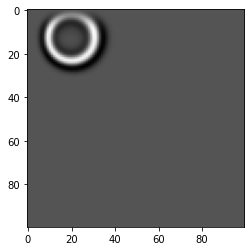

In [60]:
show(sim)

In [19]:
X = np.array(os.listdir('ae data'))
ix = np.random.choice(len(X), len(X), False)
tr, val = np.split(ix, [19000])  # разбиваем датасет

X_train = X[tr]
X_val = X[val]

In [15]:
class JustImages(Dataset):
    """
    Итерируемый класс датасета. С помощью него мы можем обращаться к данным как к итерируемому объекту. 
    """
    def __init__(self, X):
        """
        """
        self.X = X
       
    def __len__(self):
        return (len(self.X))
    
    def __getitem__(self, i):
        """
        """
        with h5py.File(J('ae data', self.X[i]), 'r') as f:
            img = f['data'][:]
        img = resize(img, (100, 100))
        img = img.reshape(1, 100, 100)
        return img.astype('float')

In [16]:
train_data = JustImages(X_train)
val_data = JustImages(X_val)


# dataloaders - с помощью нашего класса датасета сэмплируют данные в батчи
BATCH_SIZE = 50
trainloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)  
valloader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=False)

ValueError: num_samples should be a positive integer value, but got num_samples=0

In [17]:
len(X)

NameError: name 'X' is not defined

# PCA

In [25]:
from sklearn.decomposition import PCA as PCA

mas = []
for i in range(1000):
    with h5py.File(J('ae data', X[i]), 'r') as f:
            img = f['data'][:].flatten()
    
    mas.append(img)
        
            
    

In [26]:
mas = np.array(mas)
mas.shape

(1000, 160000)

In [27]:
pca = PCA(1000)
pca.fit(mas)

PCA(n_components=1000)

In [30]:
t = pca.transform(mas)

In [31]:
t.shape

(1000, 1000)

# LSTM

In [34]:
class WaveLSTM(nn.Module):

    def __init__(self):
        super(WaveLSTM, self).__init__()
        
        self.lstm = nn.LSTM(1000, 1000, num_layers = 3)
        self.linear = nn.Sequential(
            nn.Linear(1000, 1000,)
            nn.ReLU()
        )


    def forward(self, X):
        lstm = self.lstm(X)
        out = linear(lstm)
        return out

In [35]:
net = WaveLSTM()

# Autoencoder

In [81]:
class AE(nn.Module):
    def __init__(self):
        super(AE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=3, padding=1),  # b, 16, 10, 10
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=2),  # b, 16, 5, 5
            nn.Conv2d(16, 8, 3, stride=2, padding=1),  # b, 8, 3, 3
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=1),  # b, 8, 2, 2
            #nn.Conv2d(8, 8, 3, stride=2, padding=1),  # b, 8, 3, 3
            #nn.ReLU(True),
            #nn.MaxPool2d(2, stride=1)
        )
        self.linear_enc = nn.Sequential(
            nn.Linear(2048, 1000),
            #nn.BatchNorm1d(2000),
            nn.ReLU(True)
        )
        
        self.linear_dec = nn.Sequential(
            nn.Linear(1000, 2048),
            nn.BatchNorm1d(2048),
            nn.ReLU(True)
        )
        self.decoder = nn.Sequential(
            #nn.ConvTranspose2d(8, 8, 3, stride=2),  # b, 16, 5, 5
            #nn.ReLU(True),
            nn.ConvTranspose2d(8, 16, 3, stride=2),  # b, 16, 5, 5
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 8, 5, stride=3, padding=1),  # b, 8, 15, 15
            nn.ReLU(True),
            nn.ConvTranspose2d(8, 1, 2, stride=2, padding=1),  # b, 1, 28, 28
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        #print(x.flatten().shape)
        #x = self.linear_enc(x.reshape(-1, 17424))
        #x = self.linear_dec(x).reshape(-1, 8, 33, 33)
        x = self.decoder(x)
        return x


In [86]:
import ae.ConvAE_AutoConf as ConvAE

input_dim = (1, 100, 100)
feature_maps = 8
depth = 6
pooling_freq = 1e100 # large number to disable pooling layers
batch_norm_freq = 2
strided_conv_freq = 2
strided_conv_feature_maps = 8
code_size = 100

CONV_ENC_BLOCK = [("conv1", feature_maps), ("relu1", None)]
CONV_ENC_LAYERS = ConvAE.create_network(
    CONV_ENC_BLOCK, depth, 
    pooling_freq=pooling_freq,
    strided_conv_freq=strided_conv_freq, 
    strided_conv_channels=strided_conv_feature_maps,
    batch_norm_freq=batch_norm_freq)

CONV_ENC_NW = CONV_ENC_LAYERS + [("flatten1", None), ("linear1", code_size)]
net = ConvAE.ConvAE(input_dim, enc_config=CONV_ENC_NW, store_activations=False).cuda()
# print("Encoder Nw Spec:")
# CONV_ENC_NW
print(net)

ConvAE(
  (encoder): ModuleList(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (3): ReLU()
    (4): Conv2d(8, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (5): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (7): ReLU()
    (8): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (9): ReLU()
    (10): Conv2d(8, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (11): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (13): ReLU()
    (14): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (15): ReLU()
    (16):

In [87]:
#net = AE().cuda()

In [96]:
def see_result(val, output):
    val = val.detach().cpu().numpy()
    output = output.detach().cpu().numpy()
    rand = np.random.randint(len(val))
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
    axes[0].imshow(val[rand].reshape(100, 100), cmap='gray')
    axes[1].imshow(output[rand].reshape(100, 100), cmap='gray')
    fig.tight_layout()

def train_ae(model, device, loss_fn, optimizer, train_loader, val_loader, num_epoch):
    train_losses = []
    test_losses = []
    rmse = []
    criterion = nn.MSELoss() 
    
    for i in range(num_epoch):
        epoch_train_losses = []
        model.train(True)
        for img in tqdm(train_loader):
            
            img = img.cuda().float()
            result, code = model(img)
            loss = loss_fn(result, img)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            epoch_train_losses.append(loss.item())   
                    
        train_losses.append(np.mean(epoch_train_losses))
        
        # Теперь посчитаем лосс на вал
        model.eval()
        
        with torch.no_grad():
            epoch_test_losses = []
            epoch_accuracy = []

            for img in val_loader:
                img = img.cuda().float()
                result, code = model(img)
                loss = loss_fn(result, img)
                epoch_test_losses.append(loss.item())
                
                r = torch.sqrt(criterion(img, result))
                rmse.append(r.flatten().tolist())
            
            see_result(img, result)
            test_losses.append(np.mean(epoch_test_losses))
            torch.save(model.state_dict(), f'epoch_{i}.pth')  # сохраняем веса эпох
            
            print(
                'Epoch', i,
                'Train loss =', train_losses[-1],
                'Val loss =', test_losses[-1],
            )
            
    return train_losses, test_losses, rmse

In [97]:
optimizer = optim.AdamW(net.parameters(), amsgrad=True)  
criterion = torch.nn.MSELoss()


Epoch 0 Train loss = 8.01892017436472e-10 Val loss = 1.5019584332964375e-17



Epoch 1 Train loss = 6.033304694156901e-19 Val loss = 1.3174384268736211e-17



Epoch 2 Train loss = 5.972797326193487e-19 Val loss = 1.3245817683920881e-17



Epoch 3 Train loss = 6.005303493048639e-19 Val loss = 1.2764416558593342e-17



Epoch 4 Train loss = 5.907804953657437e-19 Val loss = 1.2597252621219235e-17


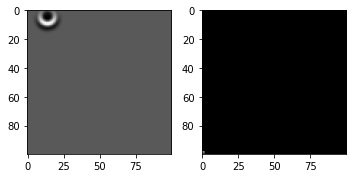

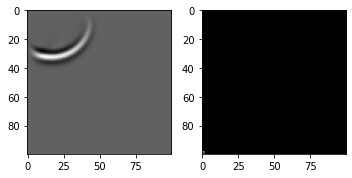

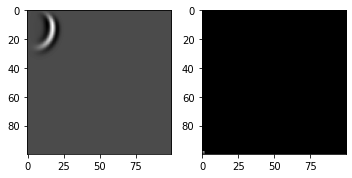

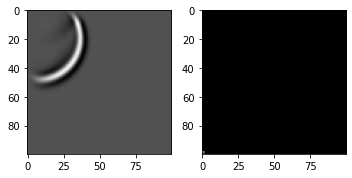

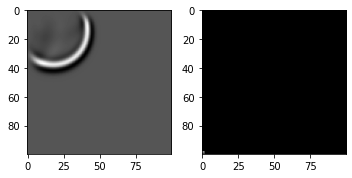

In [98]:
train_losses, val_losses, rmse = train_ae(net, device, criterion, optimizer, trainloader, valloader, 5)

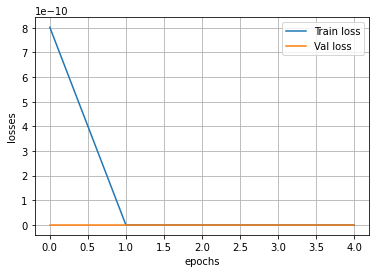

In [99]:
plt.plot(train_losses, label = 'Train loss')
plt.plot(val_losses, label = 'Val loss')
#plt.plot(rmse, label = 'RMSE')

plt.xlabel('epochs')
plt.ylabel('losses')
plt.grid()
plt.legend()
plt.show()

In [100]:
def test_ae(model, val_loader):
    criterion = nn.MSELoss()
    l = []
    for img in tqdm(val_loader):
        img = img.cuda().float()
        rec, code = model(img)
        rmse = torch.sqrt(criterion(rec, img))
        l.append(rmse.flatten().tolist())
        
    return np.mean(l)

In [101]:
test_ae(net, valloader)

3.549170135563884e-09

In [120]:
def show(sim):
    sim = np.moveaxis(sim, 2, 0)
    rand = np.random.randint(0, len(sim))
    ph = sim[rand]
    plt.imshow(ph, cmap='gray')
    return ph
ph = show(val_data[1][0])

AxisError: source: axis 2 is out of bounds for array of dimension 2

In [122]:
rec, code = net(torch.Tensor(val_data[0]).cuda().view(1, 1, 100, 100))

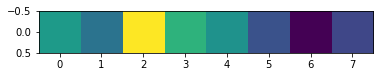

In [126]:
plt.imshow(code.detach().cpu().numpy())

In [119]:
ph = ph.reshape(1, 1, 100, 100)
rec, code = net(torch.Tensor(ph).cuda())
rec = rec.cpu().detach().numpy()
print(rec.shape)
plt.imshow(rec.reshape(100, 100), cmap='gray')

NameError: name 'ph' is not defined

In [34]:
rec.max()

0.0006923749

In [35]:
ph.max()

8.412621228436516e-09

# ----

In [190]:
def see_result(val, output):
    val = val.detach().numpy()
    output = output.detach().numpy()

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
    axes[0].imshow(val.permute(2, 0, 1))
    axes[1].imshow(output.permute(2, 0, 1) )
    fig.tight_layout()

import time
import skimage.io as io

def train_sims(model, device, loss_fn, optimizer, train_loader, val_loader, num_epoch):
    train_losses = []
    test_losses = []
    accuracy = []

    for i in range(num_epoch):
        epoch_train_losses = []
        model.train(True)
        for simulation, wav, vp, srcx, srcz, dd, dt, nabs, a, FreeSurf in tqdm(train_loader):
            
            sim = simulation[0].cuda()
            sim = sim.permute(2, 1, 0)
            k = 0
            for step in sim:
                step = step.view(1, 1, 100, 100).float()
                result, code = model(step)
                
                loss = loss_fn(result, step)

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                epoch_train_losses.append(loss.item())   
                    
        train_losses.append(np.mean(epoch_train_losses))
        
        # Теперь посчитаем лосс на вал
        model.eval()
        
        with torch.no_grad():
            del(sim)
            del(simulation)
            epoch_test_losses = []
            epoch_accuracy = []
            for simulation, wav, vp, srcx, srcz, dd, dt, nabs, a, FreeSurf in val_loader:
                
                sim = simulation[0].cuda()
                sim = sim.permute(2, 1, 0)
                for step in sim:
                    step = step.view(1, 1, 100, 100).float()
                    result, code = model(step)
                    loss = loss_fn(result, step)
                    epoch_test_losses.append(loss.item())

            test_losses.append(np.mean(epoch_test_losses))
            torch.save(model.state_dict(), f'epoch_{i}.pth')  # сохраняем веса эпох
            
            print(
                'Epoch', i,
                'Train loss =', train_losses[-1],
                'Val loss =', test_losses[-1],
            )
            
    return train_losses, test_losses, accuracy